# ✒️INTRODUCTION

A credit card is a card that allows you to borrow money to pay for goods and services with the promise that you’ll repay the card provider what you owe at a future date, typically with interest added. The money spend is the borrwed amount from the Credit Card Provider rather than from your bank account.
    
**Eligibility Criteria for approval of Credit Card:**
1. *Age*- Individuals typically need to be at least 18 years old to apply for a credit card independently.
2. *Income*-Demonstrates the financial capacity to repay credit card balances.
3. *Employeement Status*-Stability and a reliable income source enhance approval chances.
4. *Credit Score*-A numerical representation of creditworthiness based on credit history.Ex-Cibil Score

📌*Note:-The eligibility criteria for credit card approval can vary significantly among different countries, credit card issuers, and even specific card types*



---



## ✒️My Insights

1. **Why this proposal is important and how predicting a good client can be helpful for the banks ?**

👉Predicting who would be a good client is really important for banks nowadays because our financial world is quite tricky and always changing. The way banks decide whether to give someone a credit card or not is a big deal. If banks can quickly and accurately decide who they can trust to pay back loans on time, it helps them stay strong and keep providing good services. Imagine if a bank lends money to someone who can't pay it back - that could hurt the bank's ability to help other people and even stay in business!




2. **How is it going to impact the banking sector?**

👉It can be helpful in following ways:

a. **Financial Stability**-
Accurate predictions contribute to the overall stability of banks. By approving credit for individuals who are likely to repay, banks reduce the risk of financial losses due to defaults.

b. **Fraud Prevention**-
Accurate credit prediction models can incorporate features and patterns associated with fraudulent activities. By identifying suspicious behaviors or anomalies in the application data.

c. **Cost Reduction**-
Efficient credit prediction minimizes the costs associated with handling defaults and non-performing loans.

d. **Operational Efficiency**-
implementing robust predictive models streamlines the credit approval process, making it more efficient.


---



## ✔️Main Goal and Features

In this Capstone Project, the goal is to develop a predictive model that predict the Credict Card Approval based on Applicant Information. The project aims to assist Credit Card Companies/Banks in optimizing there approval processes by minimizing the risk of default and maximizing the Customer approvals.

**Objectives:**
1. Develop a Machine Learning Model that predict the Credit Card Approval
2. Analysize the key factor which affect the credict card approval decission
3. Optimize the model with Cross Validation and different types of model for better accuracy, precision, and recall while considering the business Objectives


##### The Credit Card Approval Dataset for this project have some key features include but not are limited
1. Ind_ID : Client ID
2. Gender: Gender information
3. Car_owner: Having car or not
4. Propert_owner: Having property or not
5. Children: Count of children
6. Annual_income: Annual income
7. Type_Income: Income type
8. Education: Education level
9. Marital_status: Marital_status
10. Housing_type: Living style
11. Birthday_count: Use backward count from current day (0), -1 means yesterday.
12. Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is
currently unemployed.
13. Mobile_phone: Any mobile phone
14. Work_phone: Any work phone
15. Phone: Any phone number
16. EMAIL_ID: Any email ID
17. Type_Occupation: Occupation
18. Family_Members: Family size

##### Target Dataset
1. ID: The joining key between application data and credit status data, same is Ind_ID
2.
Label: 0 is application approved and 1 is application rejected.



---



## ✔️Initial Hypothesis

1. **Data Analysis**-
Higher annual incomes correlate with higher chances of credit card approval, whereas lower incomes are linked to lower approval rates.

3. **Machine Learning**-
Initial hypothesis for Machine Learning is that Random Forest performs significantly better than all other models for credit card approval classification.

## ✔️Machine Learning Mdoels

👉 In this project, I will use different computation models to make predictions about credit card approvals. Think of these models like different tools in a toolbox. We have **Logistic Regression**, which is good for straightforward decisions. Then, there's **Decision Tree** and **Random Forest**, like smart trees that can understand complex patterns. **K-Nearest Neighbors** looks at similar examples to make predictions, and **XGBoost** is like a supercharged model that can be fine-tuned for better results. By using this mix of models and adjusting them for the best performance, I hope to create a powerful system for deciding whether to approve a credit card. I'll test them carefully to make sure they work well in real-life situations.







## ✔️Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler,StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
from sklearn import svm
from imblearn.over_sampling import RandomOverSampler
import xgboost as xgb


import warnings
warnings.filterwarnings('ignore')

## ✔️Exploring the Data

In [2]:
df0=pd.read_csv('Credit_card.csv')
df1=pd.read_csv('Credit_card_label.csv')

In [3]:
df0.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [4]:
df1.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [5]:
print(df0.shape,df1.shape)

(1548, 18) (1548, 2)


In [6]:
#Merging the datasets for Exploratory Data Analysis
df=df0.merge(df1,how='inner',on='Ind_ID')
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [7]:
df.shape

(1548, 19)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

>  The dataset consists of integer, float, and object features, and it contains some null values.

In [9]:
#Chekc for the duplicate values
df.duplicated().sum()

0

In [10]:
#Appending the Categorical and Numerical column in lists
cats = [col for col in df.columns if df[col].dtype =='O']
nums=[col for col in df.columns if df[col].dtype  !='O']

### ✔️Univariate Analysis

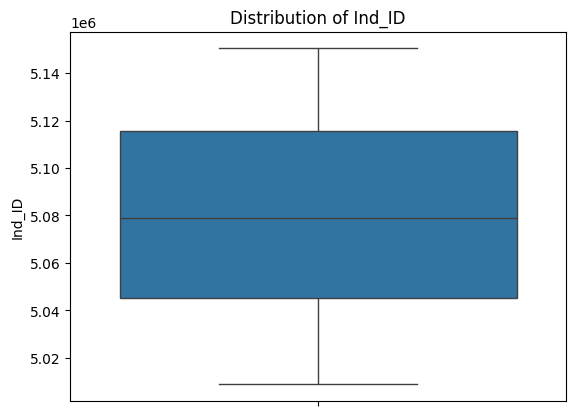

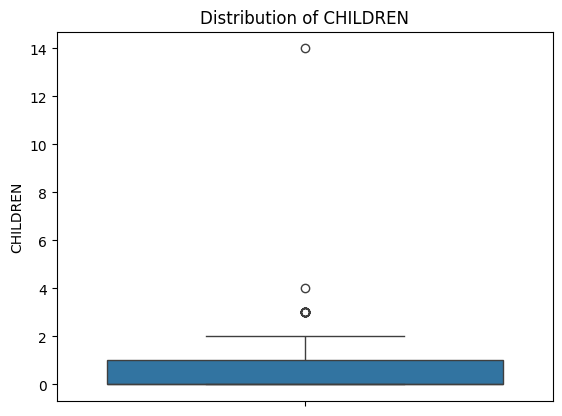

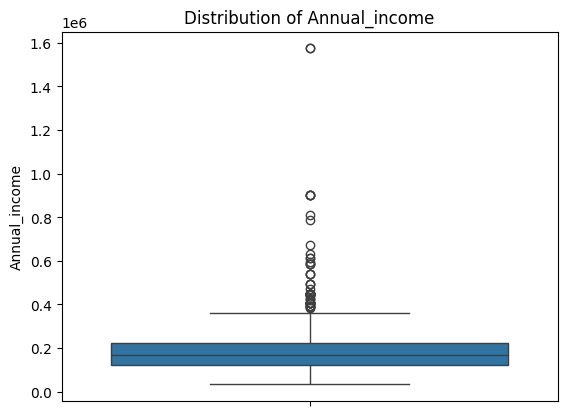

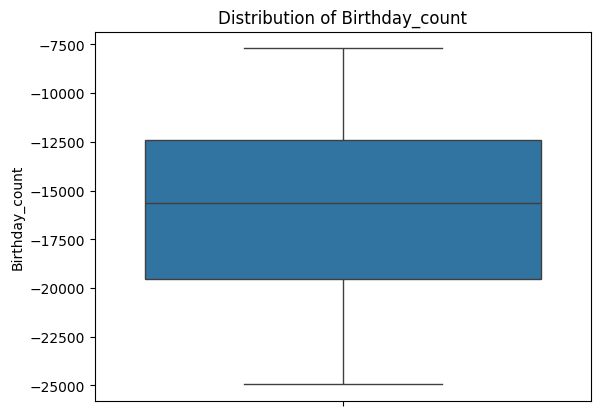

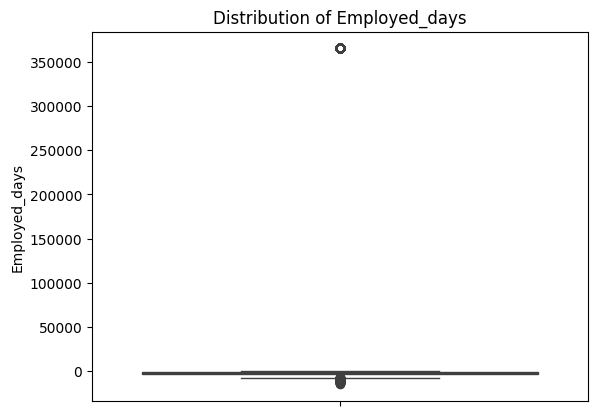

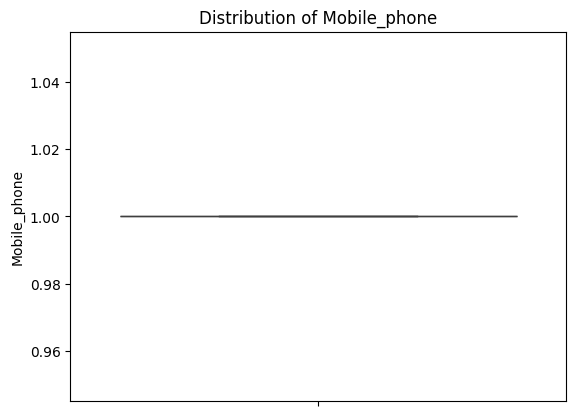

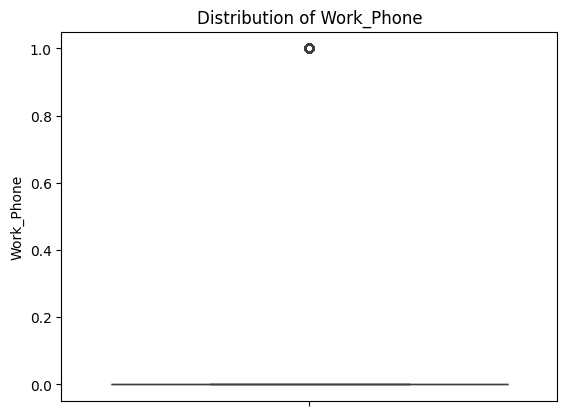

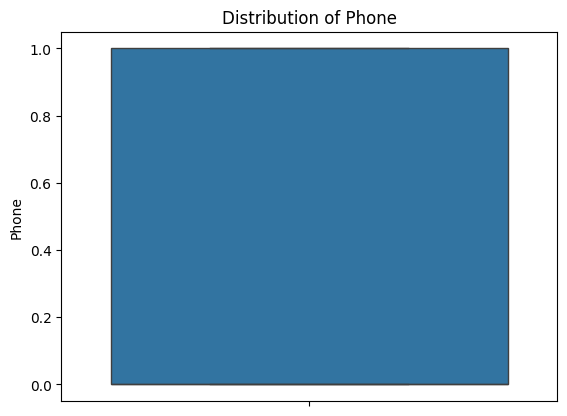

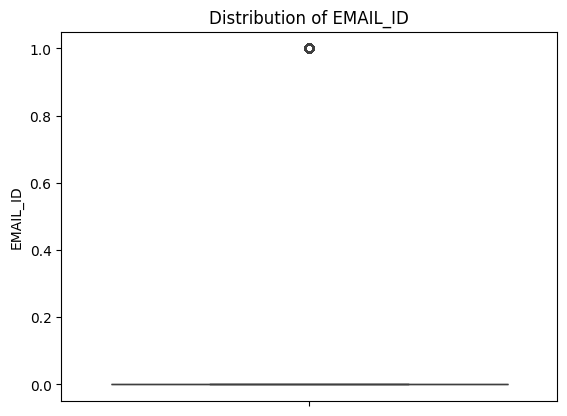

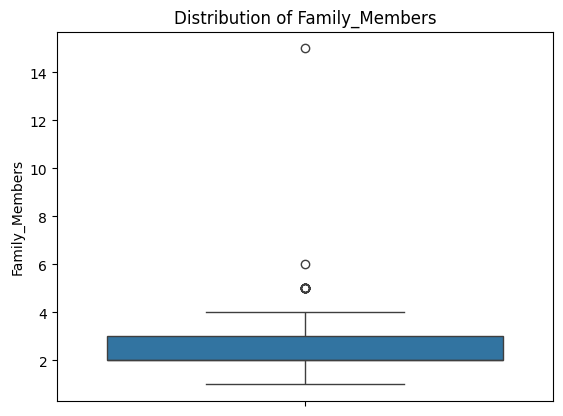

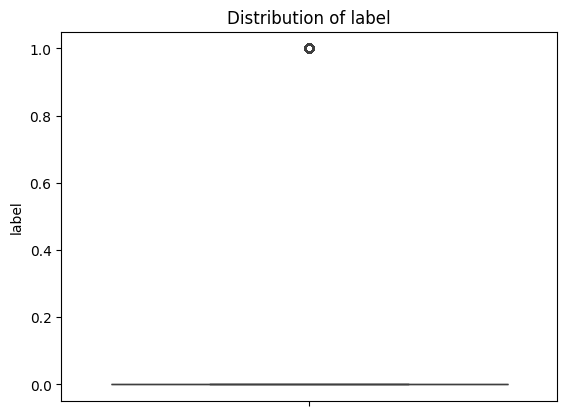

In [11]:
for i in nums:
    sns.boxplot(df[i])
    plt.title(f'Distribution of {i}')
    plt.show()

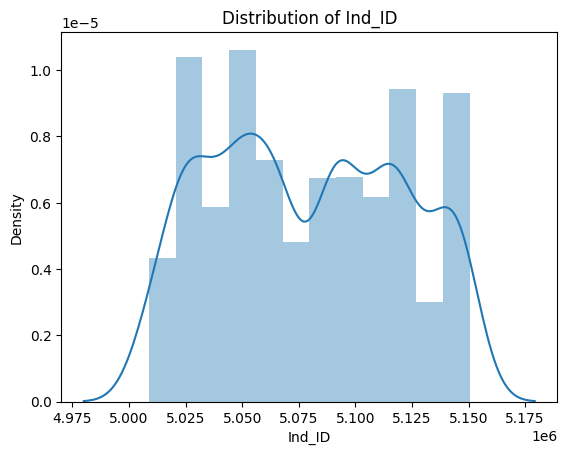

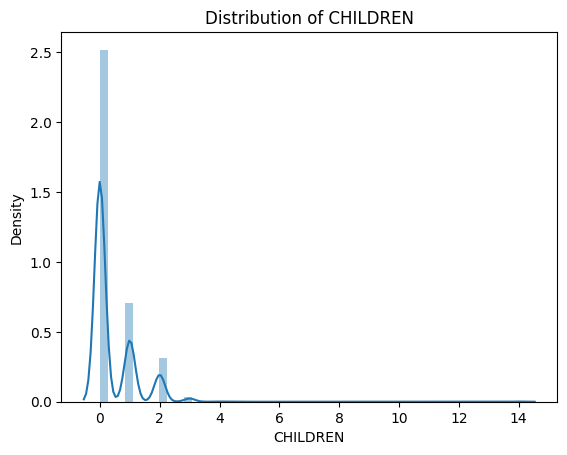

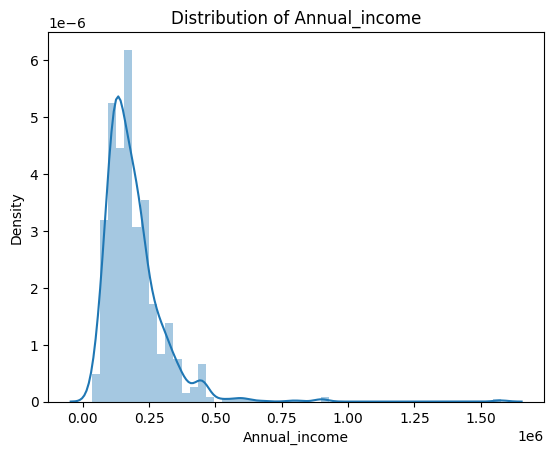

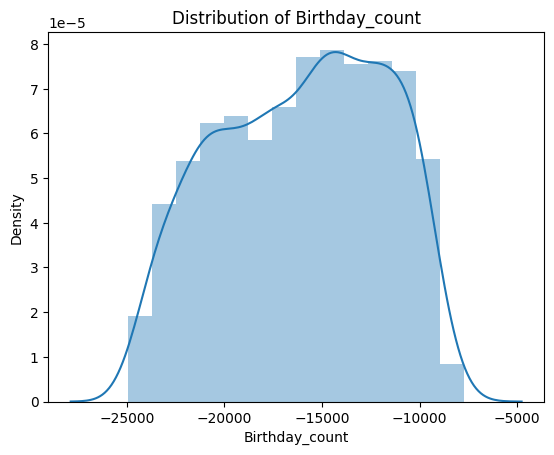

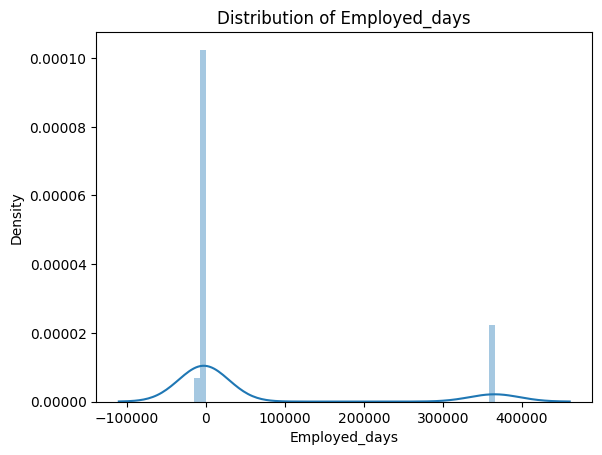

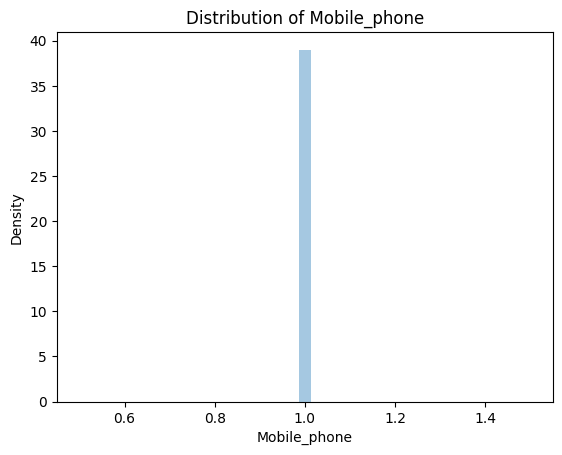

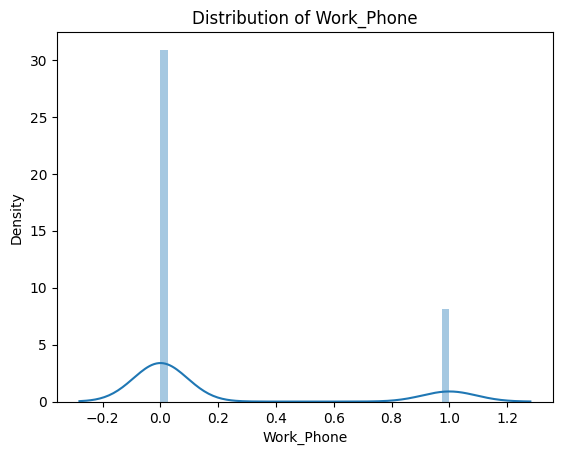

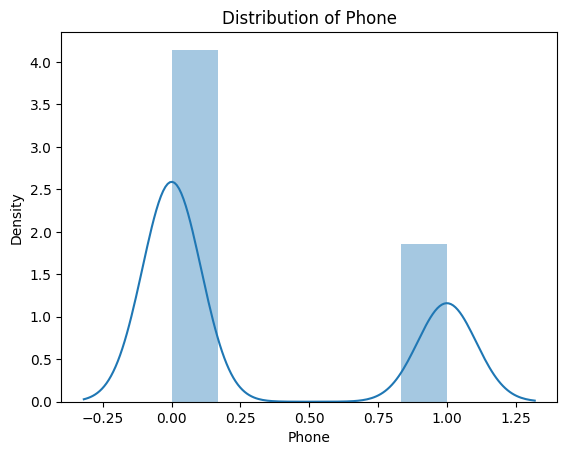

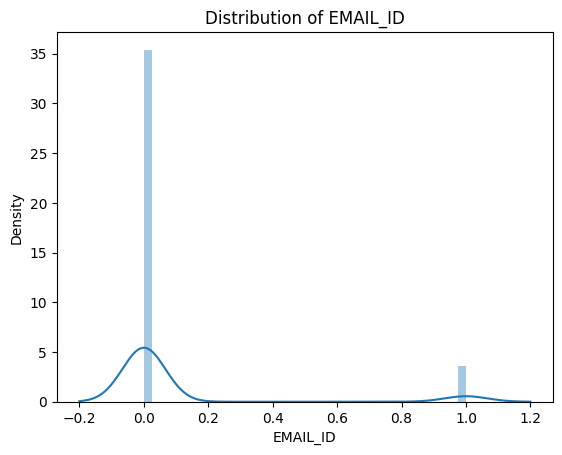

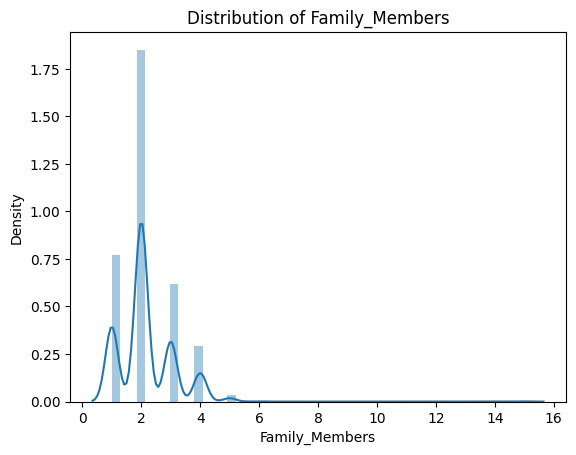

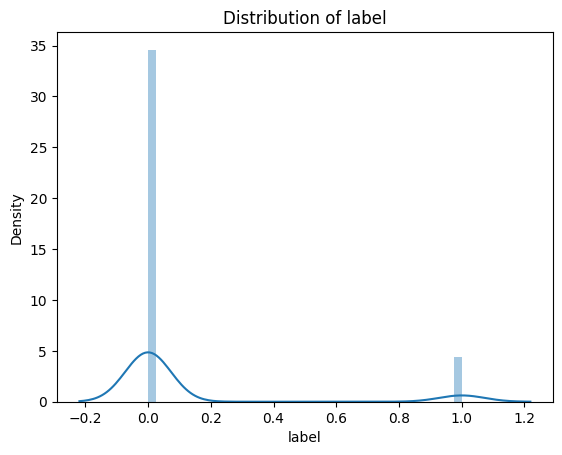

In [12]:
for i in nums:
    sns.distplot(df[i])
    plt.title(f'Distribution of {i}')
    plt.show()

    Note:
    1. After Univariate Analysis of Numerical Columns, its observed that 'Mobile_Phone' column contains same value.
    2. Annual Income Column is highly right skeweed.
    3. 90% customer does not have Email ID
    4. Max No of Children is 14

In [13]:
#Dropping the "Mobile_phone" column is recommended since it contains the same value (1) in every row,
#making it less informative for our model.
df.drop('Mobile_phone',axis=1,inplace=True)
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,NaN,2,1


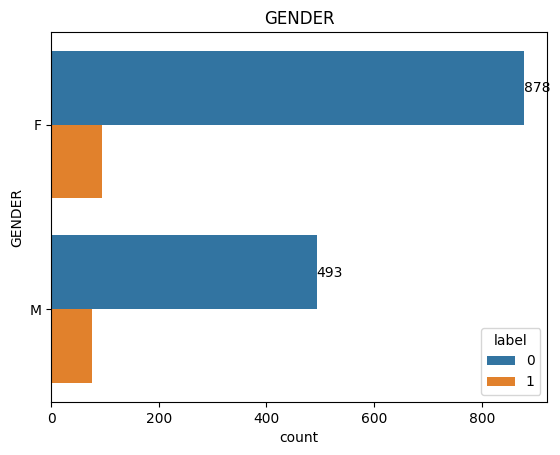

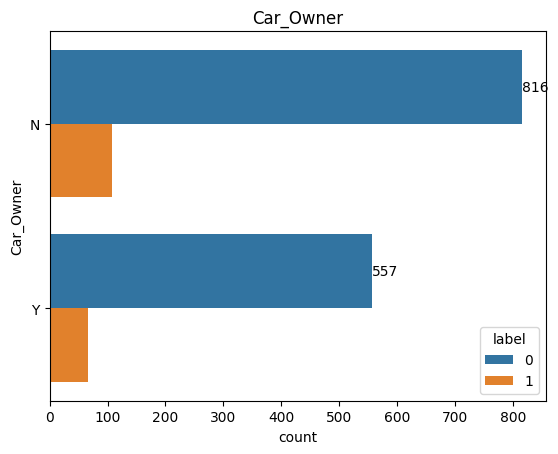

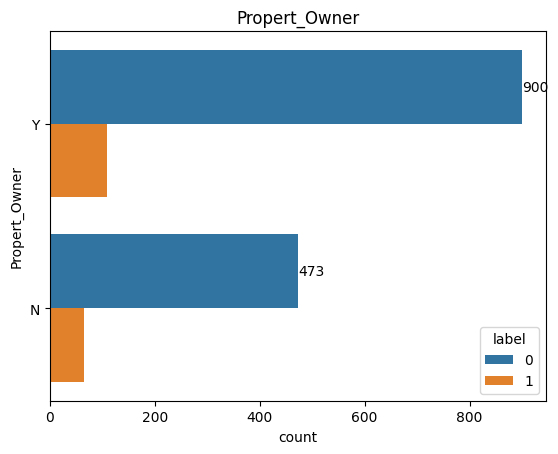

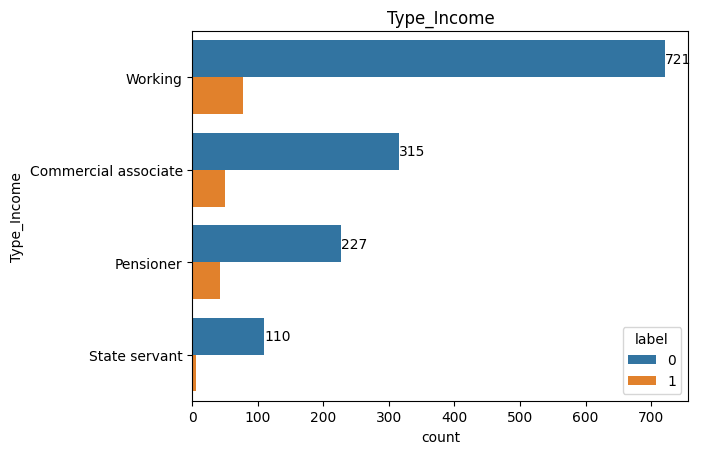

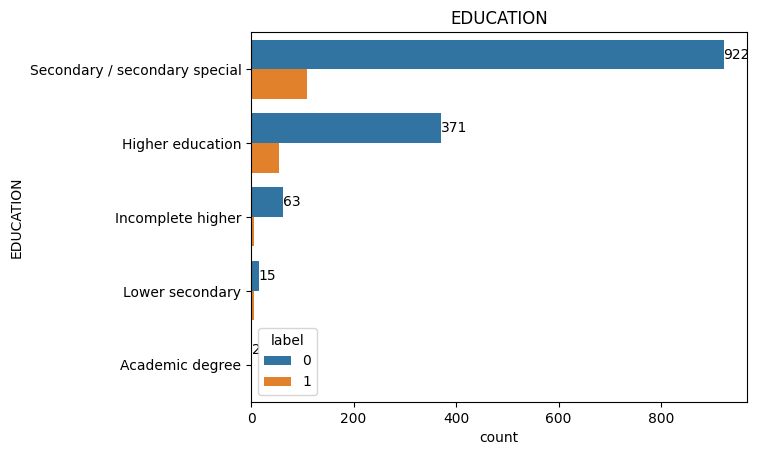

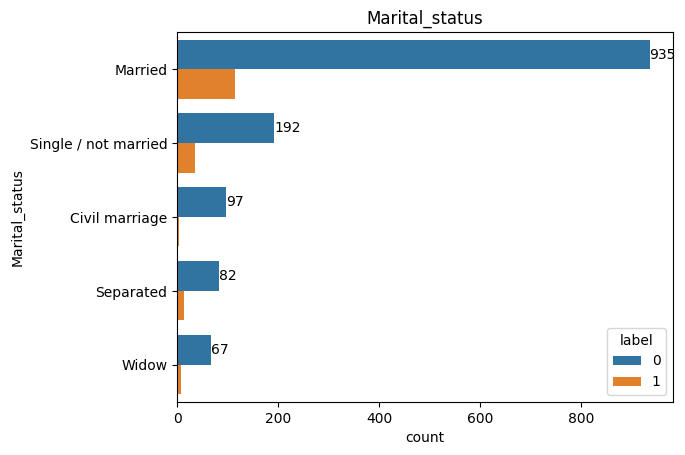

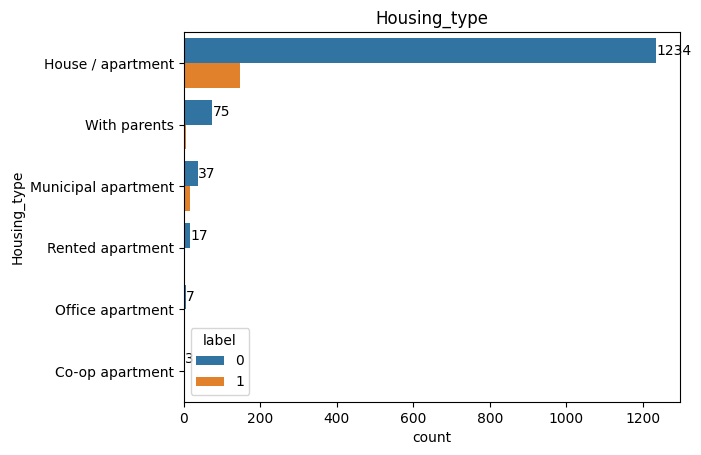

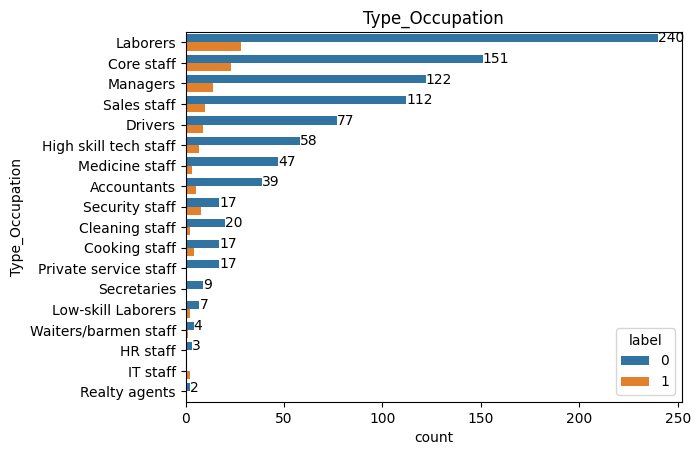

In [14]:
for i in cats:
    plots=sns.countplot(y=df[i],order=df[i].value_counts().index,hue=df['label'])
    plots.bar_label(plots.containers[0])
    plt.title(i)
    plt.show()


    >Note- From the aboove analysis of Categorical columns, it is observed that:
    1. 90% applicant has their own house/aparment
    2. 67% applicants are married
    3. Among the applicants 66% has Secondary level Degree
    4. There are 63% of Female applicants applied for Credit Card.

## ✔️Data Cleaning

In [15]:
df[cats].head()

,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type,Type_Occupation
0,M,Y,Y,Pensioner,Higher education,Married,House / apartment,NaN
1,F,Y,N,Commercial associate,Higher education,Married,House / apartment,NaN
2,F,Y,N,Commercial associate,Higher education,Married,House / apartment,NaN
3,F,Y,N,Commercial associate,Higher education,Married,House / apartment,NaN
4,F,Y,N,Commercial associate,Higher education,Married,House / apartment,NaN


In [16]:
#Replacing some unimportant variables in columns
df['EDUCATION']=df['EDUCATION'].replace('Secondary / secondary special','secondary')
df['Marital_status']=df['Marital_status'].replace('Single / not married','single')
df['Housing_type']=df['Housing_type'].replace('House / apartment','house')

In [17]:
#Check the null values
df.isna().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [18]:
round(df.isna().sum()/df.shape[0]*100,2).sort_values(ascending=False)

Type_Occupation    31.52
Annual_income       1.49
Birthday_count      1.42
GENDER              0.45
Ind_ID              0.00
Family_Members      0.00
EMAIL_ID            0.00
Phone               0.00
Work_Phone          0.00
Employed_days       0.00
Housing_type        0.00
Marital_status      0.00
EDUCATION           0.00
Type_Income         0.00
CHILDREN            0.00
Propert_Owner       0.00
Car_Owner           0.00
label               0.00
dtype: float64

<Axes: >

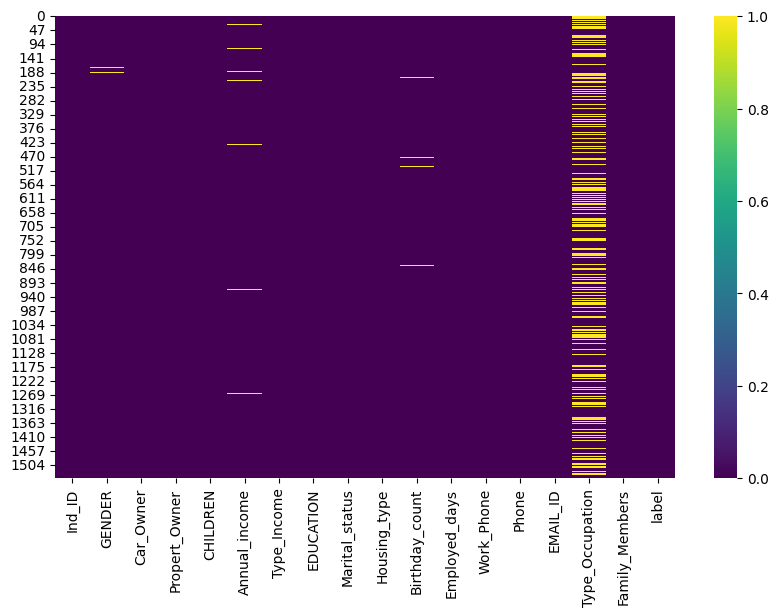

In [19]:
cols=df.columns
plt.figure(figsize=(10,6))
sns.heatmap(df[cols].isna(),cmap='viridis')

In [20]:
#Filling the null values
mean_anual_col=round(df['Annual_income'].mean(),2)
mode_gender_col=df['GENDER'].mode()[0]
mean_bdy=round(df['Birthday_count'].mean(),0)

df['Annual_income'].fillna(mean_anual_col,inplace=True)
df['GENDER'].fillna(mode_gender_col,inplace=True)
df['Birthday_count'].fillna(mean_bdy,inplace=True)

In [21]:
df['Type_Occupation'].value_counts()

Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

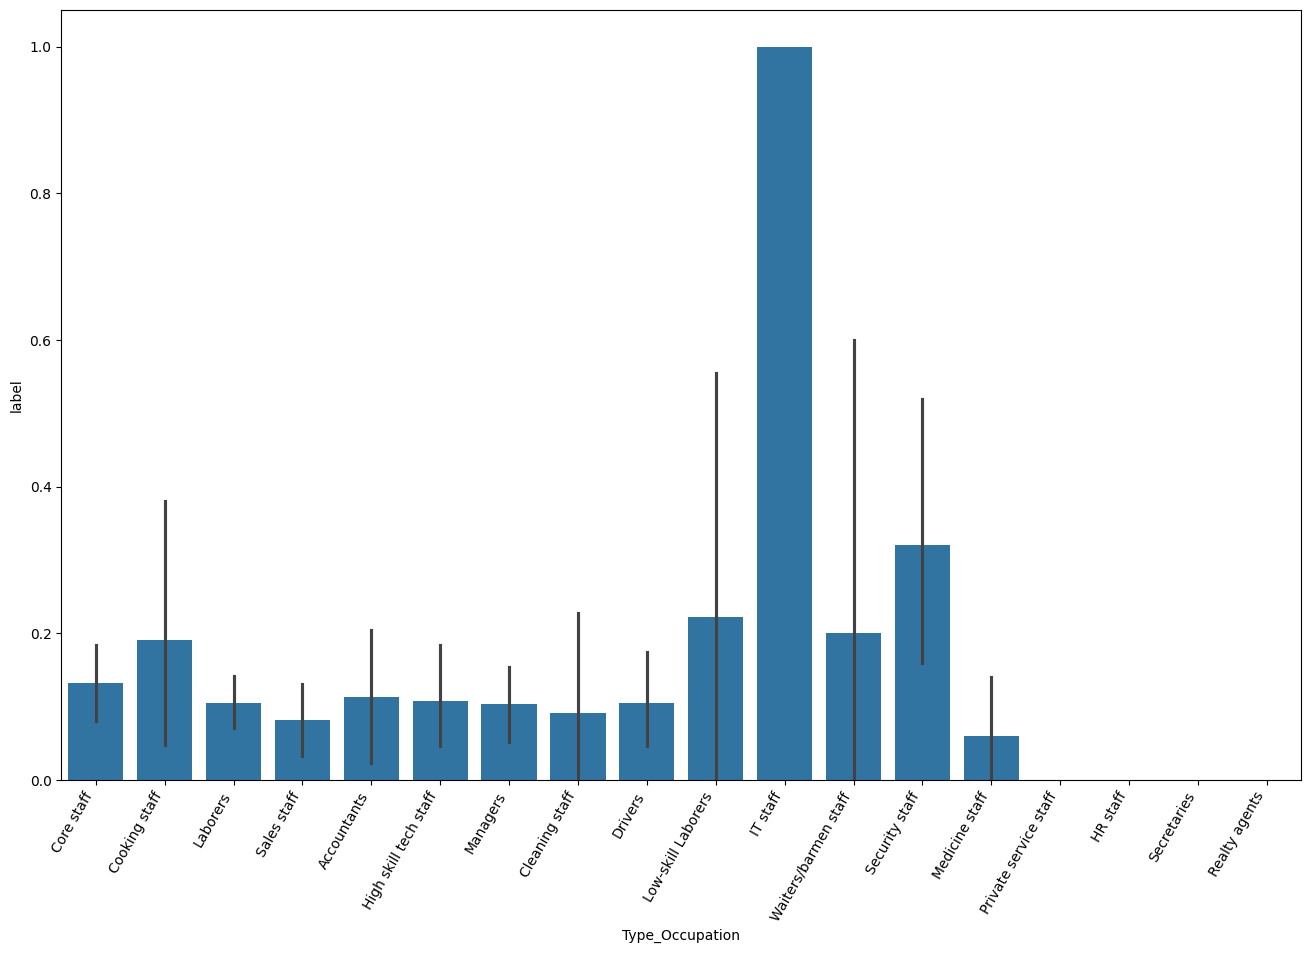

In [22]:
plt.figure(figsize = (16,10))
ty_occ=sns.barplot(x='Type_Occupation',y='label',data=df)
plt.xticks(rotation=60,ha='right')
plt.show()

In [23]:
for type_inc, group in df.groupby('Type_Income'):
    print('\n',type_inc)
    print(group['Type_Occupation'].value_counts())


 Commercial associate
Laborers                 54
Managers                 53
Sales staff              47
Core staff               36
Drivers                  22
High skill tech staff    21
Accountants              17
Medicine staff            9
Security staff            7
Private service staff     7
Low-skill Laborers        3
Waiters/barmen staff      3
Cleaning staff            3
Cooking staff             2
Realty agents             2
Secretaries               2
Name: Type_Occupation, dtype: int64

 Pensioner
Core staff            2
Low-skill Laborers    1
Medicine staff        1
Managers              1
Name: Type_Occupation, dtype: int64

 State servant
Core staff               36
Medicine staff           17
Managers                 14
Laborers                  9
High skill tech staff     8
Accountants               5
Drivers                   4
Secretaries               2
Private service staff     2
Cooking staff             1
Name: Type_Occupation, dtype: int64

 Working
Laborer

> ##### Note:- Considering substantial variability and over 31% missing values, it's suggested to drop the 'Type_Occupation' column from the dataset.

In [24]:
df.drop('Type_Occupation',axis=1,inplace=True)

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ind_ID,1548.0,5.078920e+06,41717.587742,5008827.0,5045069.75,5078841.5,5115673.00,5150412.0
CHILDREN,1548.0,4.127907e-01,0.776691,0.0,0.00,0.0,1.00,14.0
Annual_income,1548.0,1.913993e+05,112407.951318,33750.0,121500.00,171000.0,225000.00,1575000.0
Birthday_count,1548.0,-1.604034e+04,4199.321477,-24946.0,-19476.00,-15814.5,-12483.00,-7705.0
Employed_days,1548.0,5.936469e+04,137808.062701,-14887.0,-3174.50,-1565.0,-431.75,365243.0
Work_Phone,1548.0,2.080103e-01,0.406015,0.0,0.00,0.0,0.00,1.0
Phone,1548.0,3.094315e-01,0.462409,0.0,0.00,0.0,1.00,1.0
EMAIL_ID,1548.0,9.237726e-02,0.289651,0.0,0.00,0.0,0.00,1.0
Family_Members,1548.0,2.161499e+00,0.947772,1.0,2.00,2.0,3.00,15.0
label,1548.0,1.130491e-01,0.316755,0.0,0.00,0.0,0.00,1.0


## ✔️Feature Engineering

In [26]:
#Divide each row with 365 to get the age of applicants
df['age']=round(df['Birthday_count']/(-365),0)

In [27]:
df[df['Employed_days']>0].head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Family_Members,label,age
0,5008827,M,Y,Y,0,180000.00,Pensioner,Higher education,Married,house,-18772.0,365243,0,0,0,2,1,51.0
7,5009894,F,N,N,0,180000.00,Pensioner,secondary,Married,house,-22134.0,365243,0,0,0,2,1,61.0
26,5024916,F,N,Y,0,112500.00,Pensioner,secondary,Married,house,-21832.0,365243,0,1,0,2,1,60.0
27,5024917,F,N,Y,0,191399.33,Pensioner,secondary,Married,house,-21832.0,365243,0,1,0,2,1,60.0
31,5029311,F,N,Y,0,112500.00,Pensioner,secondary,Married,house,-21876.0,365243,0,1,1,2,1,60.0


**The 'Employed days' column consistently shows a value of 365243, which is greater than the corresponding 'Age' values. This suggests that the applicants with this value are likely unemployed. Considering this, we may treat this value as an indicator of unemployment in the dataset.**

In [28]:
#Add a column 'experience' as exp_in_yrs
exp=[]
for days in df['Employed_days']:
    if days<0:
        exp.append(round(days/(-365),2))
    else:
        exp.append(days-days)
df['exp_in_yrs']=pd.Series(exp)


In [29]:
#Drop the Uneccessery columns
df.drop(['Birthday_count','Employed_days'],axis=1,inplace=True)

In [30]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Work_Phone,Phone,EMAIL_ID,Family_Members,label,age,exp_in_yrs
0,5008827,M,Y,Y,0,180000.00,Pensioner,Higher education,Married,house,0,0,0,2,1,51.0,0.00
1,5009744,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,house,1,1,0,2,1,37.0,1.61
2,5009746,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,house,1,1,0,2,1,44.0,1.61
3,5009749,F,Y,N,0,191399.33,Commercial associate,Higher education,Married,house,1,1,0,2,1,37.0,1.61
4,5009752,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,house,1,1,0,2,1,37.0,1.61


In [31]:
nums=[col for col in df.columns if df[col].dtype  !='O']

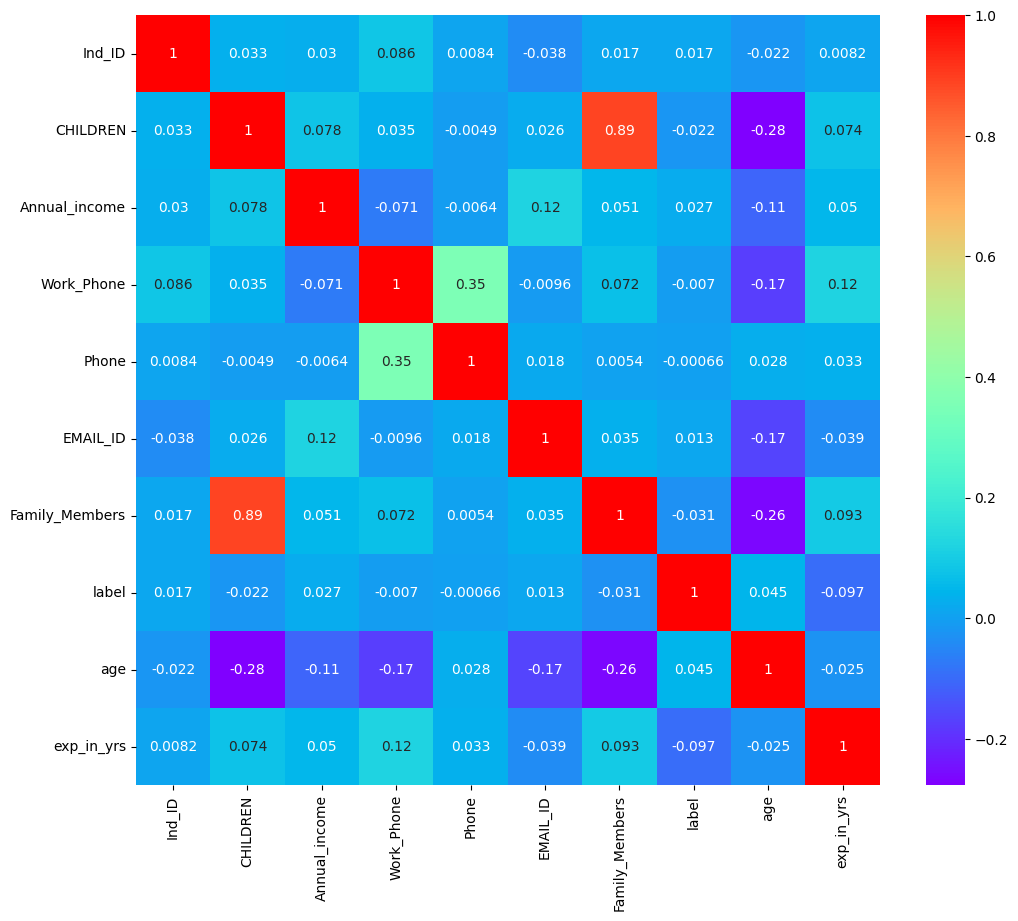

In [32]:
plt.figure(figsize=(12,10))
sns.heatmap(df[nums].corr(),annot=True,cmap='rainbow')
plt.show()

In [33]:
#Make a copy of cleand dataset for SQL Analysis
SQL_data=df.copy()

In [34]:
df.drop(['Ind_ID'],axis=1,inplace=True)

### ✔️Bivariate Analysis

In [35]:
df.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Work_Phone,Phone,EMAIL_ID,Family_Members,label,age,exp_in_yrs
0,M,Y,Y,0,180000.00,Pensioner,Higher education,Married,house,0,0,0,2,1,51.0,0.00
1,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,house,1,1,0,2,1,37.0,1.61
2,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,house,1,1,0,2,1,44.0,1.61
3,F,Y,N,0,191399.33,Commercial associate,Higher education,Married,house,1,1,0,2,1,37.0,1.61
4,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,house,1,1,0,2,1,37.0,1.61


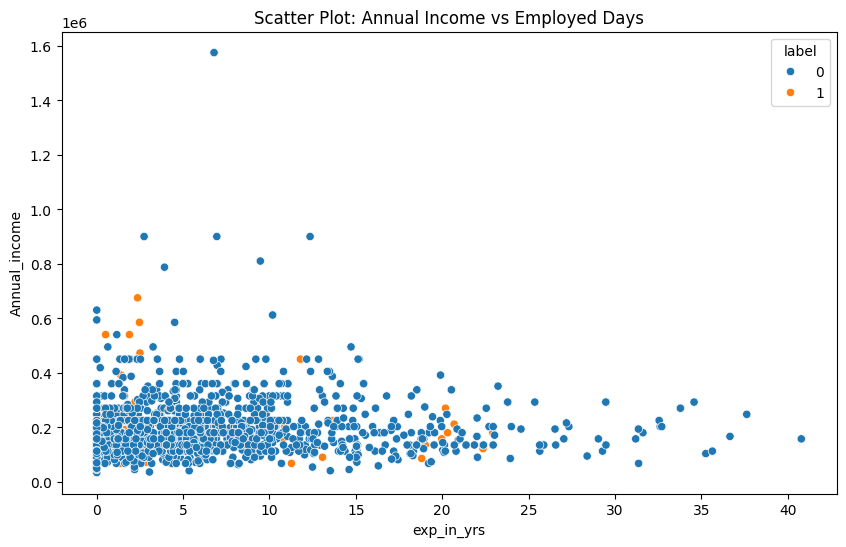

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['exp_in_yrs'], y='Annual_income', data=df, hue='label')
plt.title('Scatter Plot: Annual Income vs Employed Days')
plt.show()


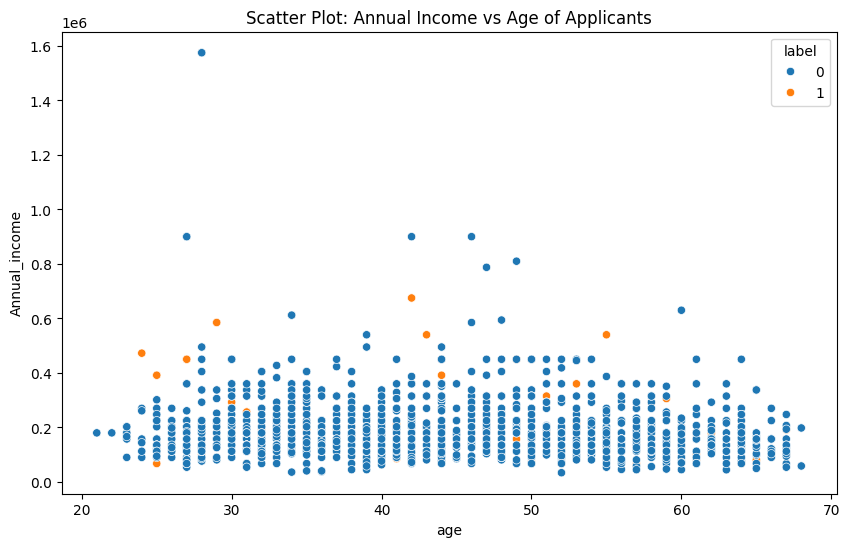

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['age'], y='Annual_income', data=df, hue='label')
plt.title('Scatter Plot: Annual Income vs Age of Applicants')
plt.show()


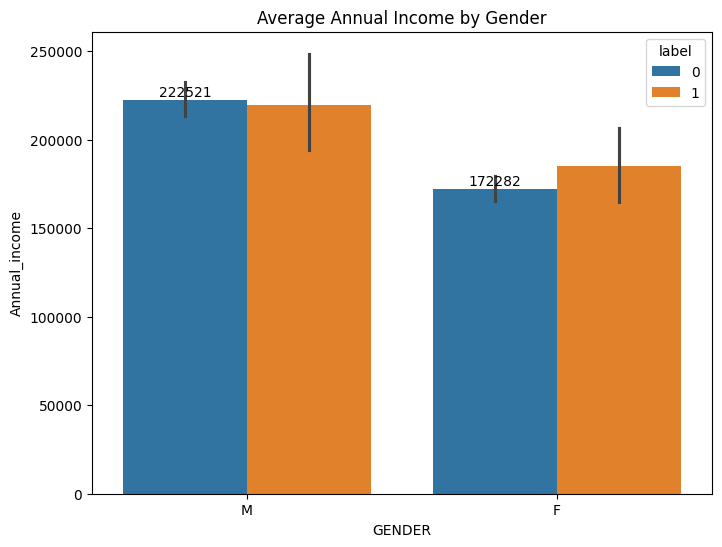

In [38]:
plt.figure(figsize=(8,6))
in_gen=sns.barplot(x='GENDER',y='Annual_income',hue='label',data=df)
in_gen.bar_label(in_gen.containers[0])
plt.title('Average Annual Income by Gender')
plt.show()

In [39]:
df.groupby(['GENDER']).max()[['Annual_income']]

,Annual_income
GENDER,
F,1575000.0
M,900000.0


>#### Note-
>1. Maximum Income Registered by Female- 1575000
>2. Male users on average, have a higher income of 222132 compared to females.

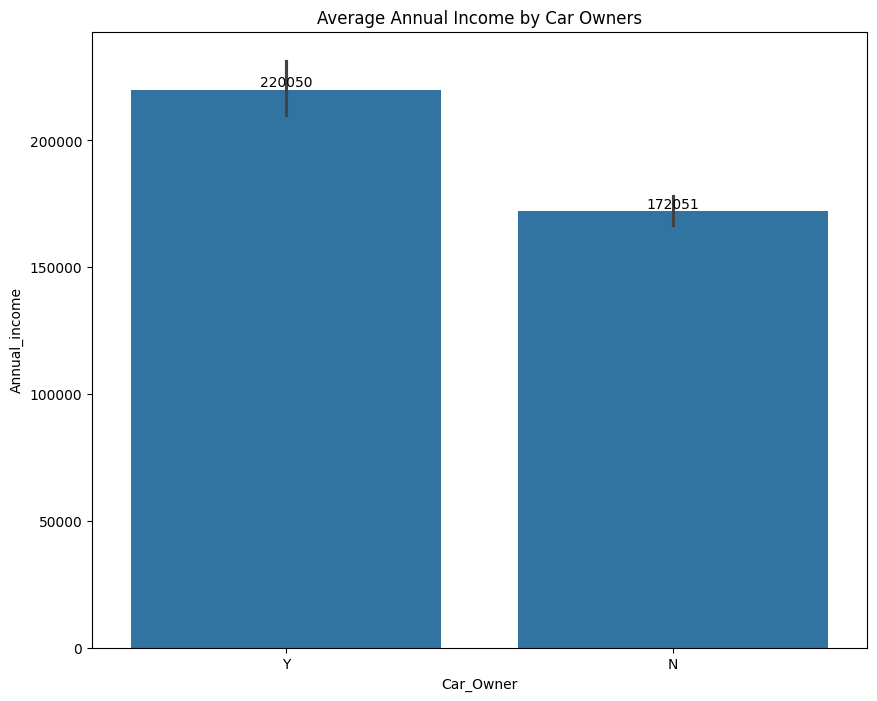

In [40]:
plt.figure(figsize=(10,8))
in_car=sns.barplot(x='Car_Owner',y='Annual_income',data=df)
in_car.bar_label(in_car.containers[0])
plt.title('Average Annual Income by Car Owners')
plt.show()



In [41]:
df.groupby(['Car_Owner']).max()[['Annual_income']].sort_values(by='Annual_income',ascending=False)

,Annual_income
Car_Owner,
Y,1575000.0
N,900000.0


> #### Note-
> There is Clear positive Corelation between Car Owners and Annual Income, With the increase in income Car purchase also increase.

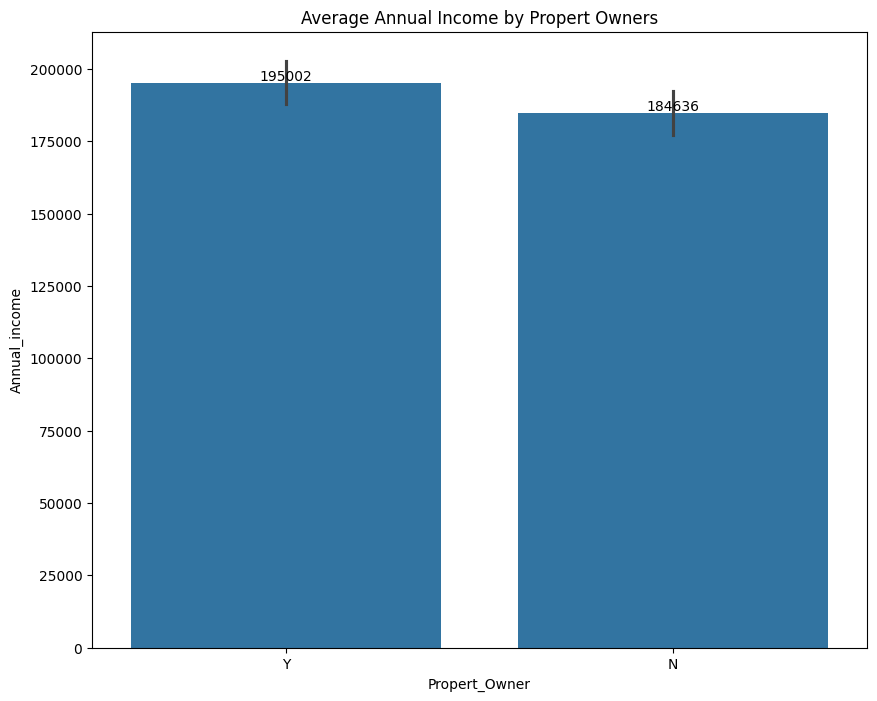

In [42]:
plt.figure(figsize=(10,8))
in_prop=sns.barplot(x='Propert_Owner',y='Annual_income',data=df)
in_prop.bar_label(in_prop.containers[0])
plt.title('Average Annual Income by Propert Owners')
plt.show()

In [43]:
df.groupby(['Propert_Owner']).max()[['Annual_income']].sort_values(by='Annual_income',ascending=False)

,Annual_income
Propert_Owner,
Y,1575000.0
N,594000.0


>#### Note-
>It is observed that with there is no major difference in Average Incomes by Property Owners.

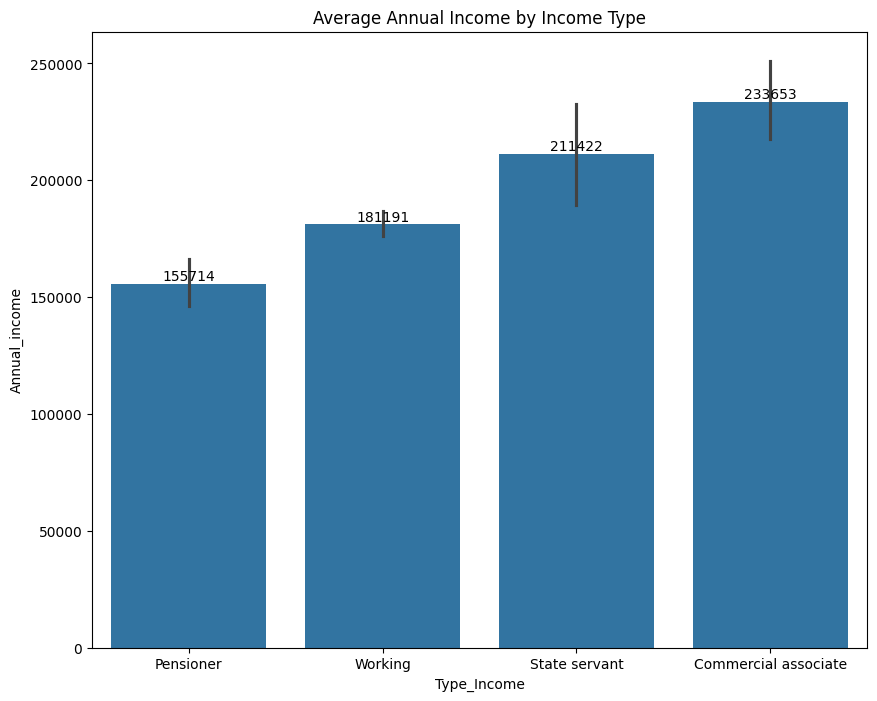

In [44]:
order_by_inc=df.groupby('Type_Income')['Annual_income'].mean().sort_values().index
plt.figure(figsize=(10,8))
in_type=sns.barplot(x='Type_Income',y='Annual_income',data=df,order=order_by_inc)
in_type.bar_label(in_type.containers[0])
plt.title('Average Annual Income by Income Type')
plt.show()

In [45]:
df.groupby(['Type_Income']).max()[['Annual_income']].sort_values(by='Annual_income',ascending=False)

,Annual_income
Type_Income,
Commercial associate,1575000.0
Working,900000.0
State servant,787500.0
Pensioner,630000.0


>#### Note-
> Highest Average Income with maximum Annual Income is registered by Commercial Associates.


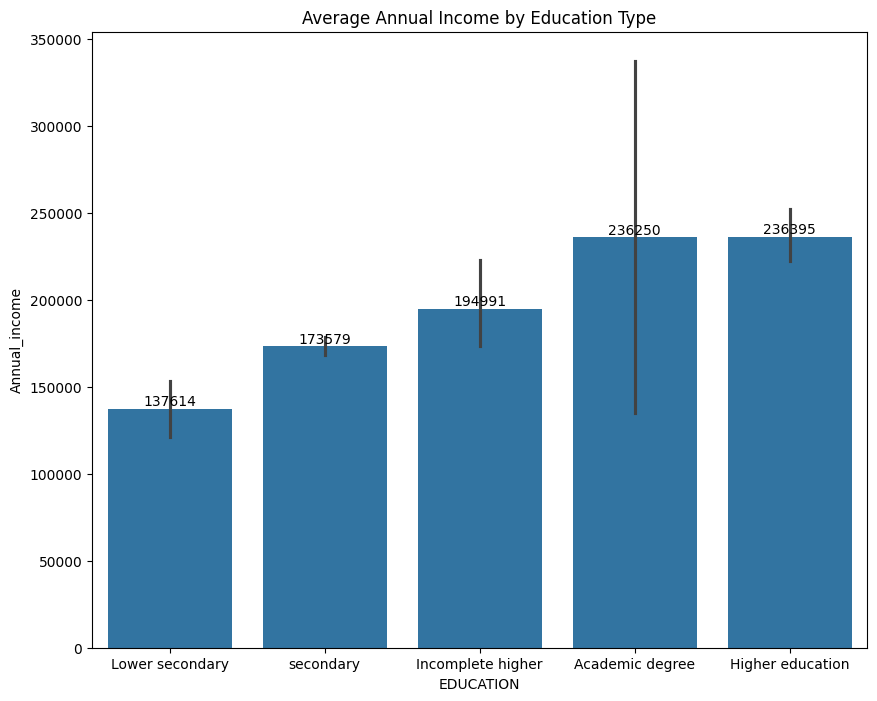

In [46]:
order_by_edu=df.groupby('EDUCATION')['Annual_income'].mean().sort_values().index
plt.figure(figsize=(10,8))
in_edu=sns.barplot(x='EDUCATION',y='Annual_income',data=df,order=order_by_edu)
in_edu.bar_label(in_edu.containers[0])
plt.title('Average Annual Income by Education Type')
plt.show()

In [47]:
df.groupby(['EDUCATION']).max()[['Annual_income']].sort_values(by='Annual_income',ascending=False)

,Annual_income
EDUCATION,
Higher education,1575000.0
secondary,900000.0
Incomplete higher,810000.0
Academic degree,337500.0
Lower secondary,202500.0


> #### Note-
> 1. The average incomes of users with Higher Education and Academic Degree show minimal difference.
> 2. The maximum Annual Income is earned by the user having Higher Education.
> 3. There is Moderate Positive Correlation between Education type and Anual Income.

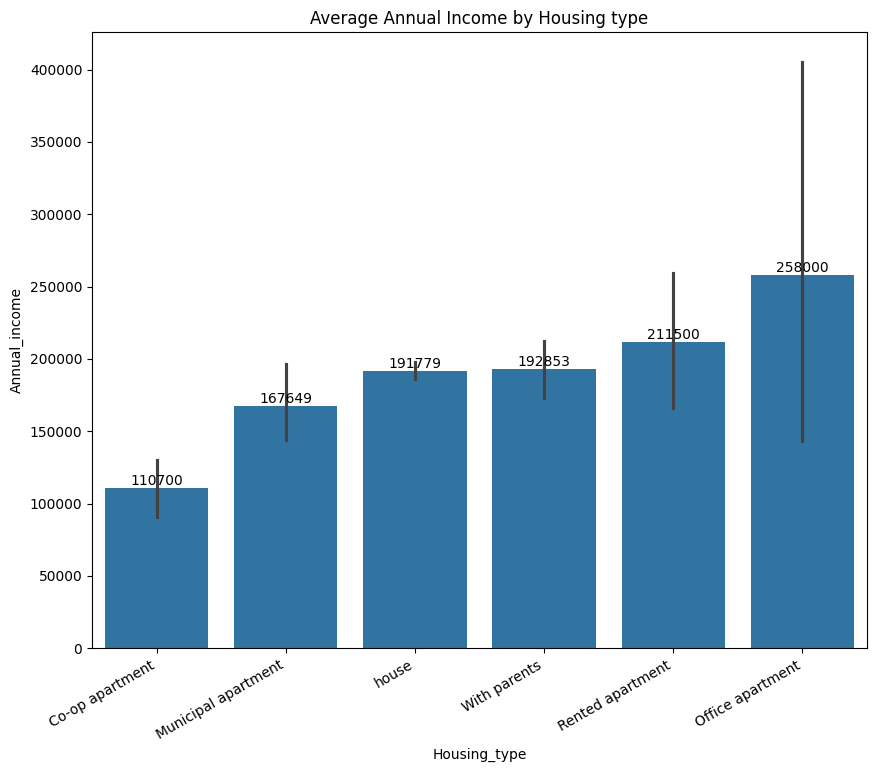

In [48]:
order_by_house=df.groupby('Housing_type')['Annual_income'].mean().sort_values().index
plt.figure(figsize=(10,8))
in_ho=sns.barplot(x='Housing_type',y='Annual_income',data=df,order=order_by_house)
in_ho.bar_label(in_ho.containers[0])
plt.title('Average Annual Income by Housing type')
plt.xticks(rotation=30,ha='right')
plt.show()

In [49]:
df.groupby(['Housing_type']).max()[['Annual_income']].sort_values(by='Annual_income',ascending=False)

,Annual_income
Housing_type,
house,1575000.0
Office apartment,810000.0
Municipal apartment,594000.0
With parents,585000.0
Rented apartment,495000.0
Co-op apartment,135000.0


> #### Note-
> 1. Users living in Office Apartment have highest Average Income in comparison to other users.
> 2. The users living in their own Houses have the highest recorded Maximum Income.

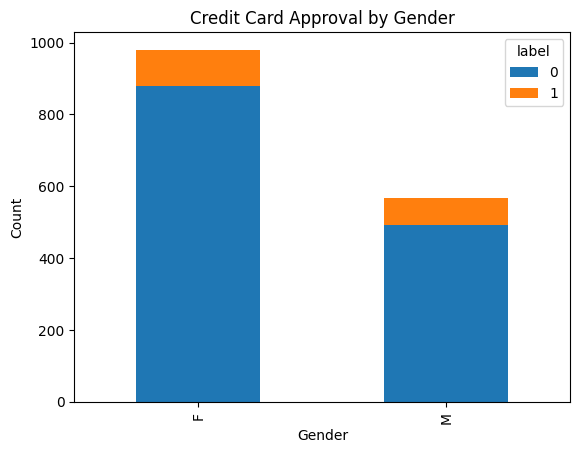

In [50]:
cross_tab = pd.crosstab(df['GENDER'], df['label'])
cross_tab.plot(kind='bar', stacked=True)
plt.title('Credit Card Approval by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


> #### Note-
> 1. Approximately 90% of applications in both categories face rejection based on gender.
> 2. The number of female users applying for credit cards exceeds that of males.

In [51]:
approved = df[df['label'] == 1]['Annual_income']
denied = df[df['label'] == 0]['Annual_income']

# Perform independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(approved, denied, equal_var=False)

# Print results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("Fail to reject the null hypothesis: Higher mean annual incomes are associated with approved credit cards.")
else:
    print("Reject the null hypothesis: No significant difference in mean annual incomes between the approved and denied credit card applications.")



T-statistic: 1.0343837622744783
P-value: 0.3021025490987983
Reject the null hypothesis: No significant difference in mean annual incomes between the approved and denied credit card applications.


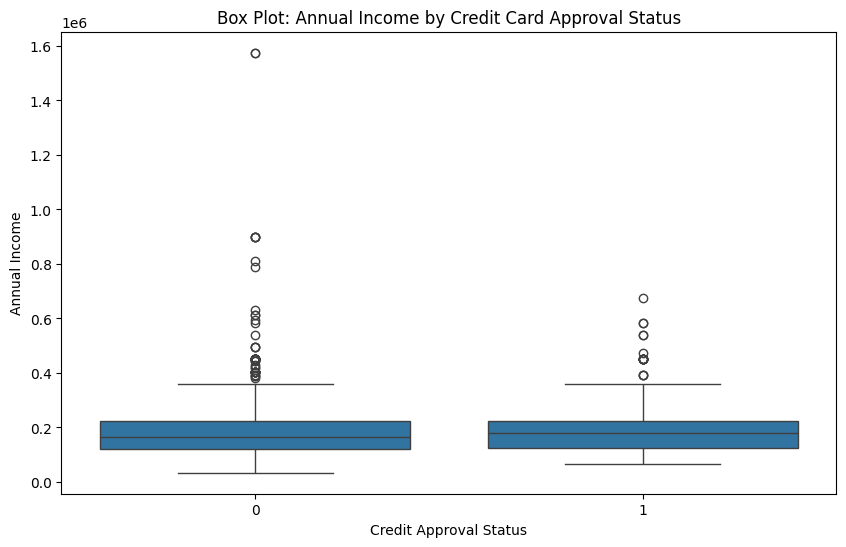

In [52]:
plt.figure(figsize=(10,6))
sns.boxplot(x='label', y='Annual_income', data=df)
plt.title('Box Plot: Annual Income by Credit Card Approval Status')
plt.xlabel('Credit Approval Status')
plt.ylabel('Annual Income')
plt.show()


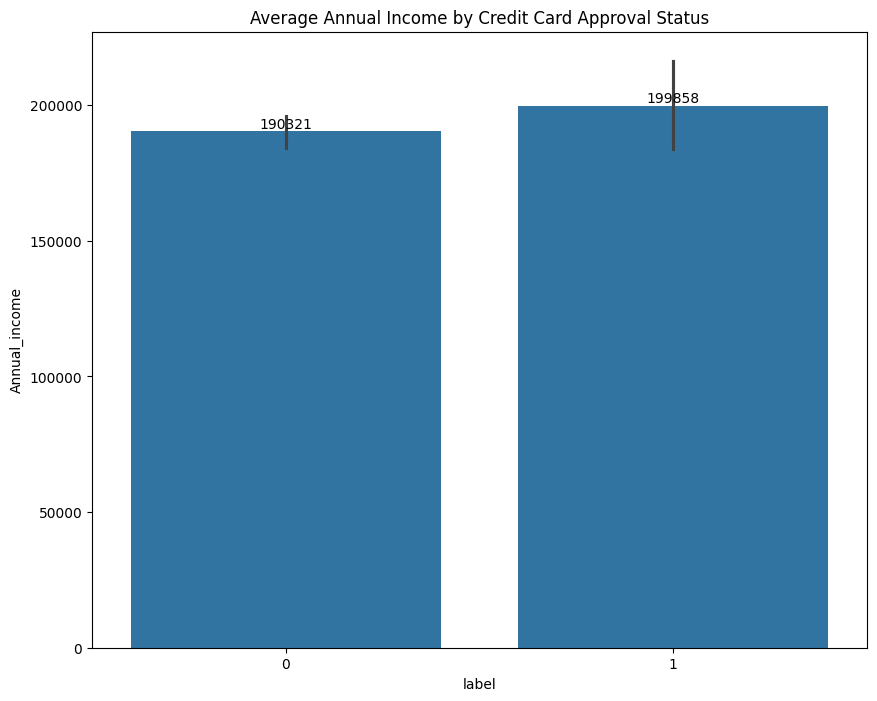

In [53]:
plt.figure(figsize=(10,8))
in_label=sns.barplot(x='label',y='Annual_income',data=df)
in_label.bar_label(in_label.containers[0])
plt.title('Average Annual Income by Credit Card Approval Status')
plt.show()

In [54]:
df.groupby(['label']).max()[['Annual_income']].sort_values(by='Annual_income',ascending=False).head()

,Annual_income
label,
0,1575000.0
1,675000.0


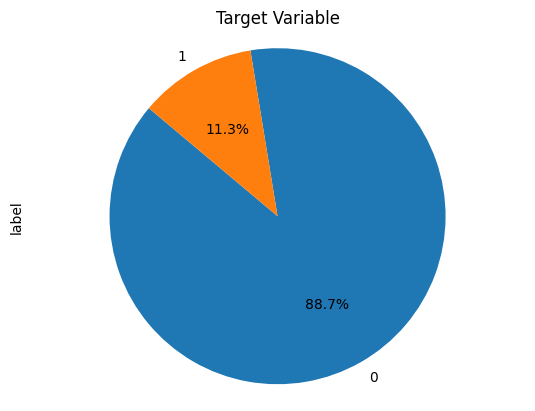

In [55]:
df['label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Target Variable')
plt.show()

> #### Note
> Out of all users 89% are denied credit card approval due to being categorized as risky.


#### 📌Note- From the above analysis, it appear the data is imbalanced its suggested to prevent overfitting consider to enhance  the data for better balance

### ✔️Data Encoding

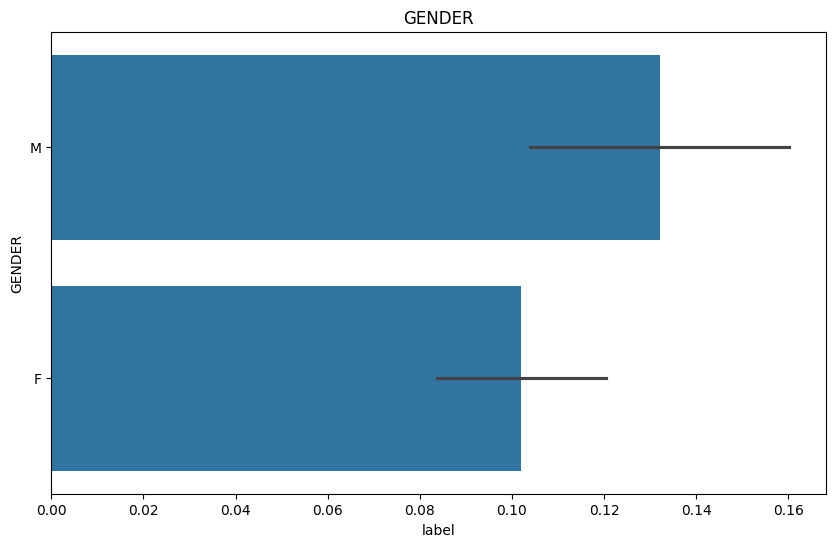

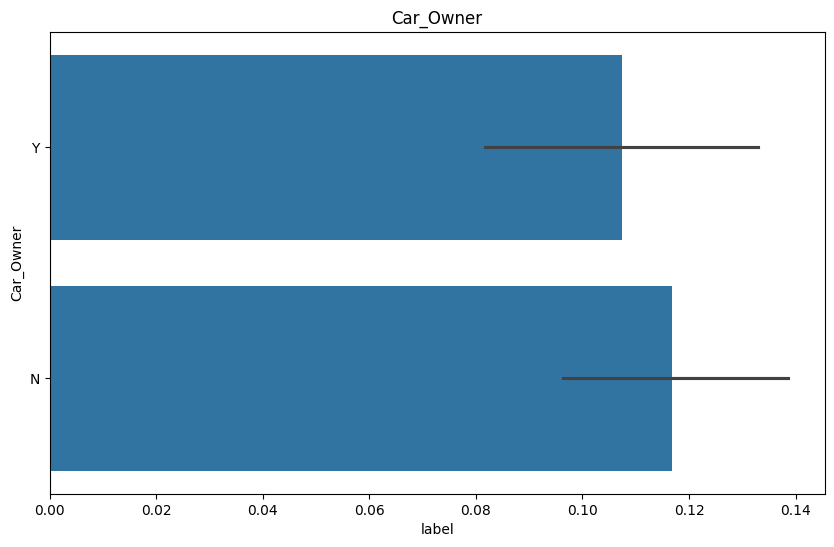

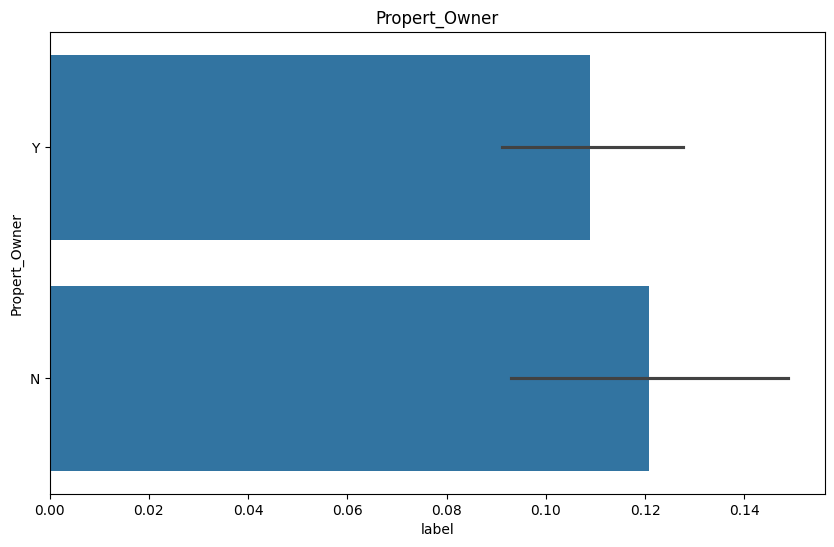

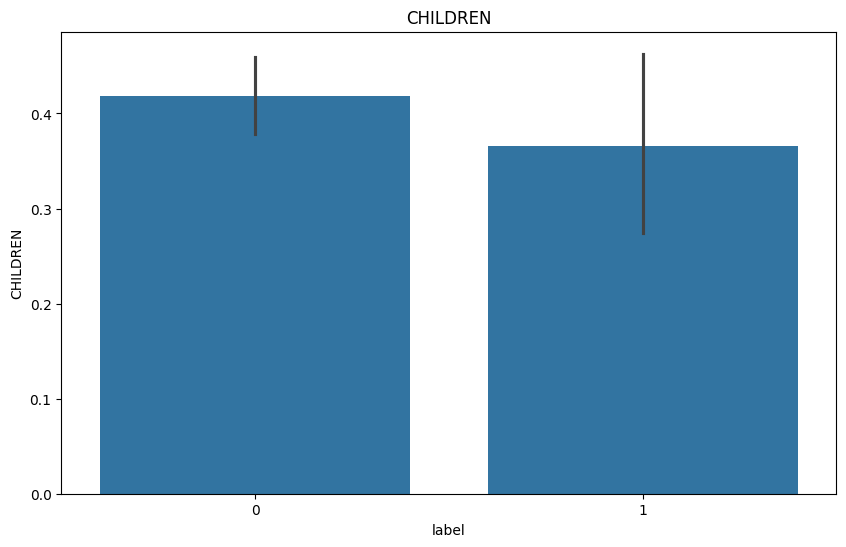

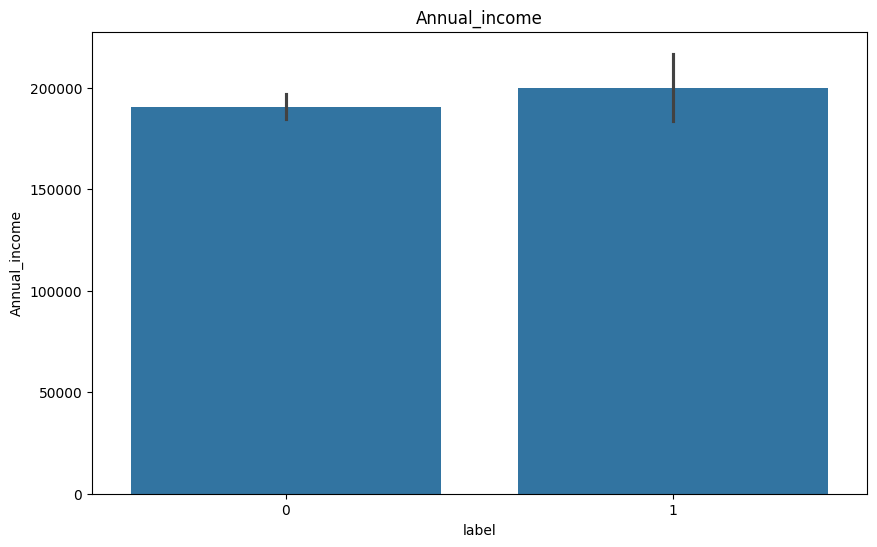

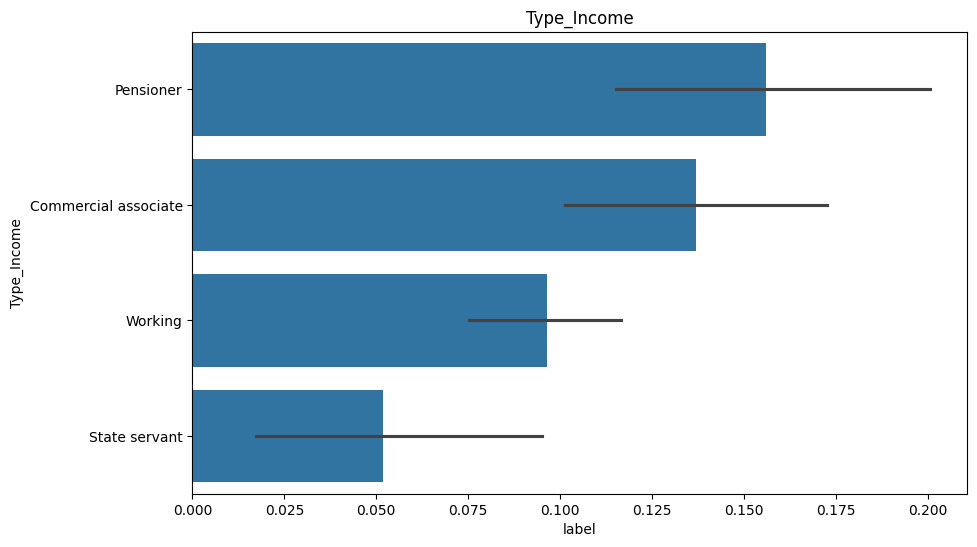

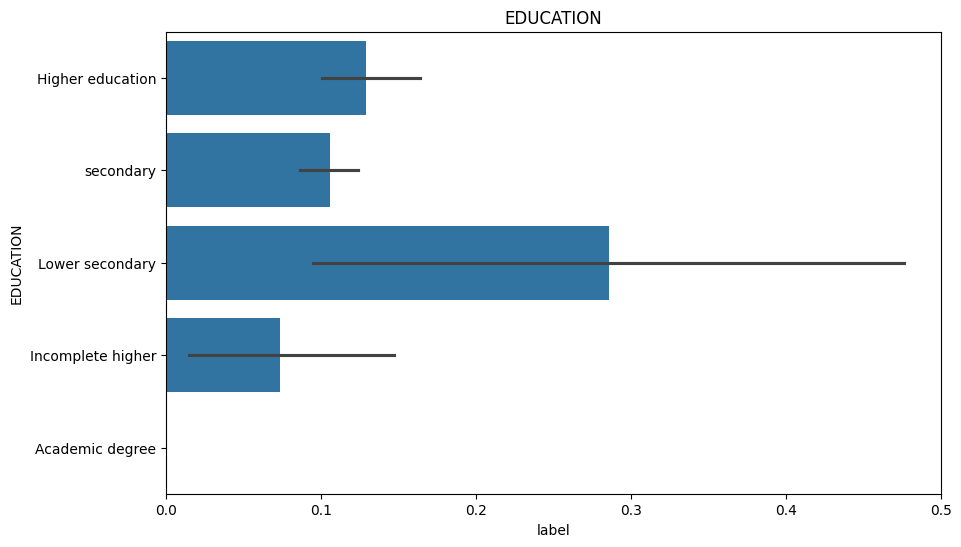

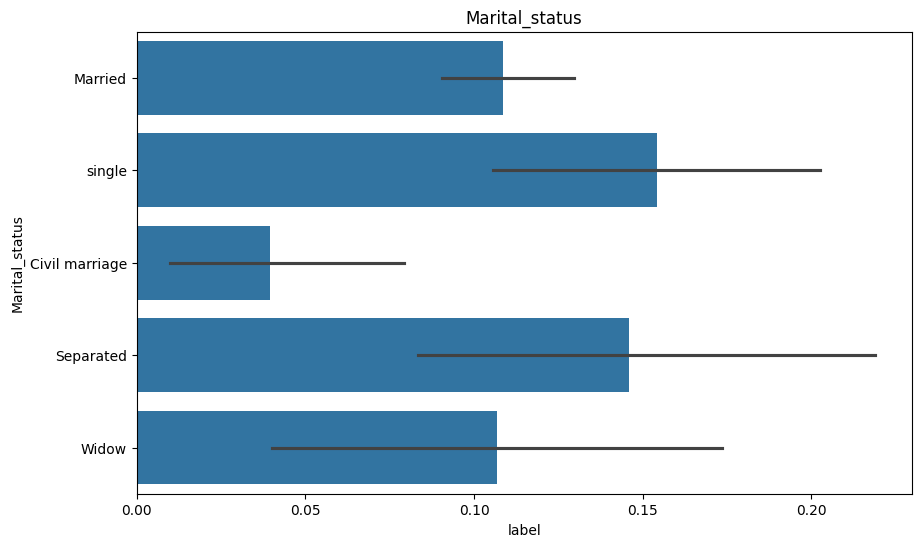

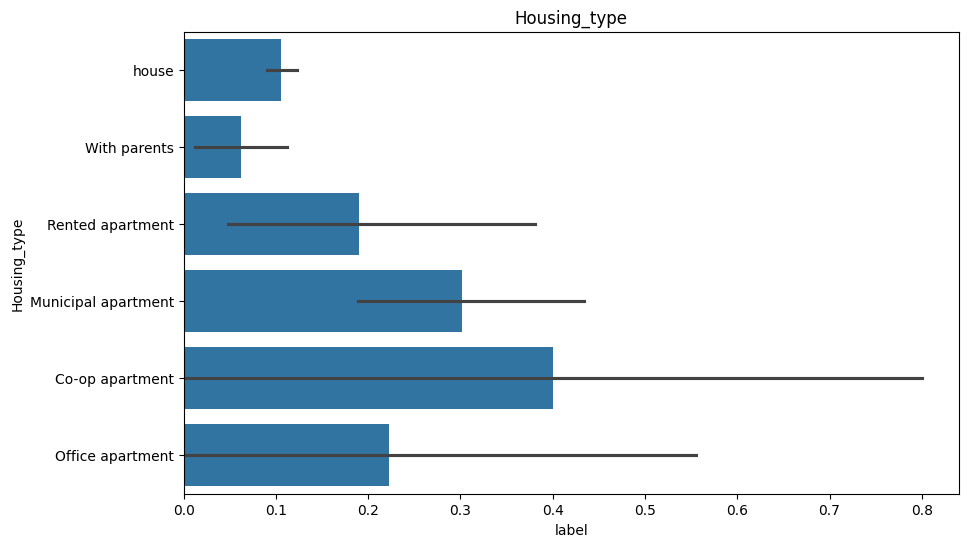

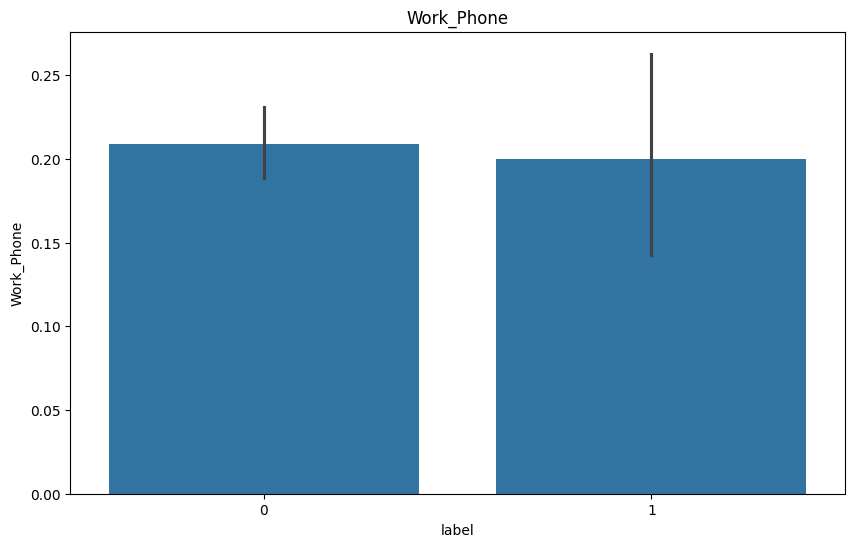

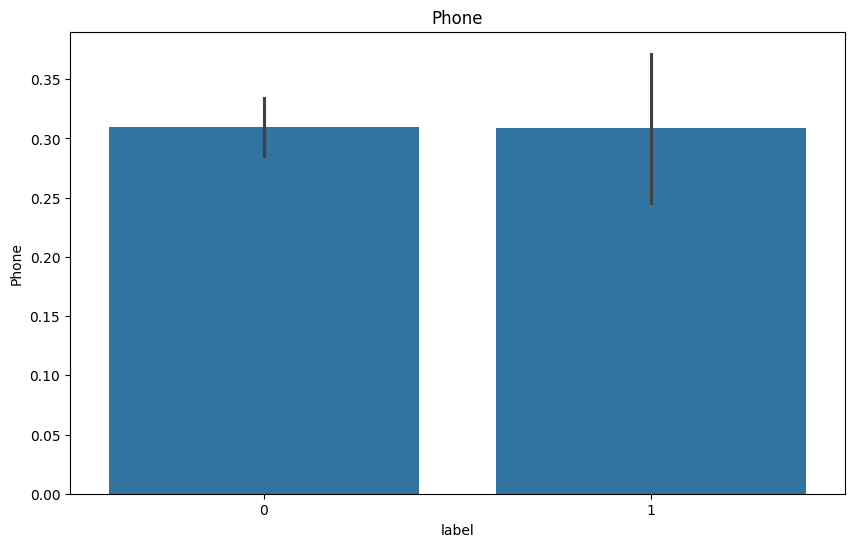

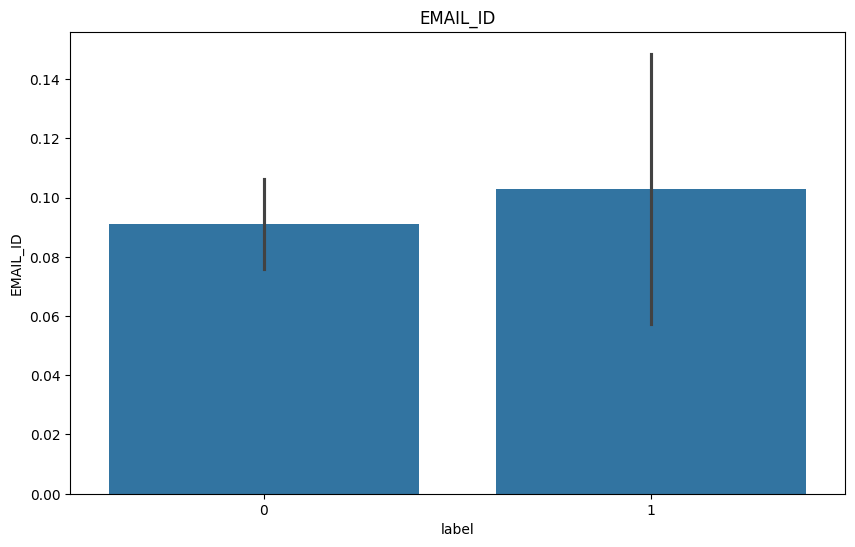

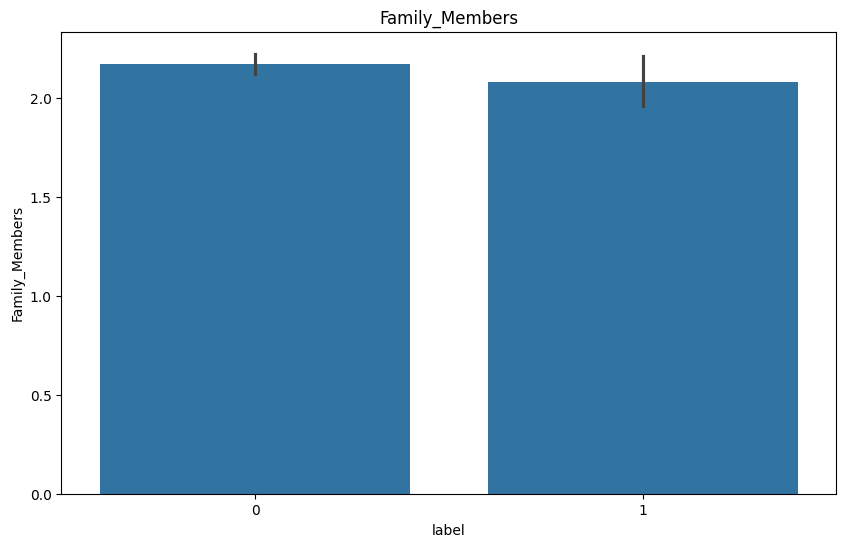

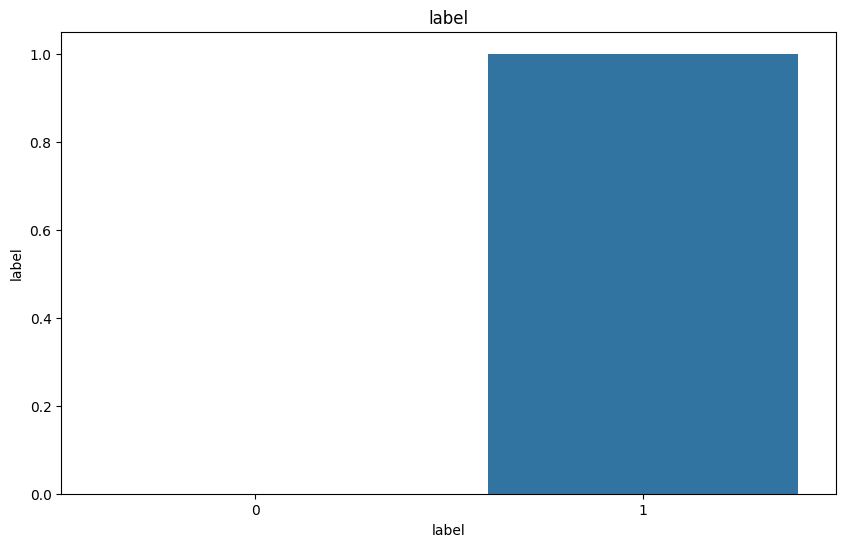

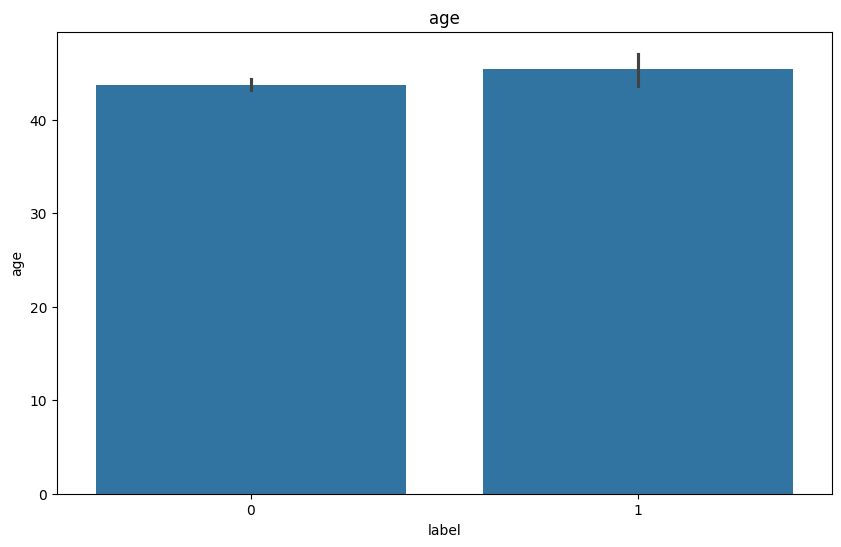

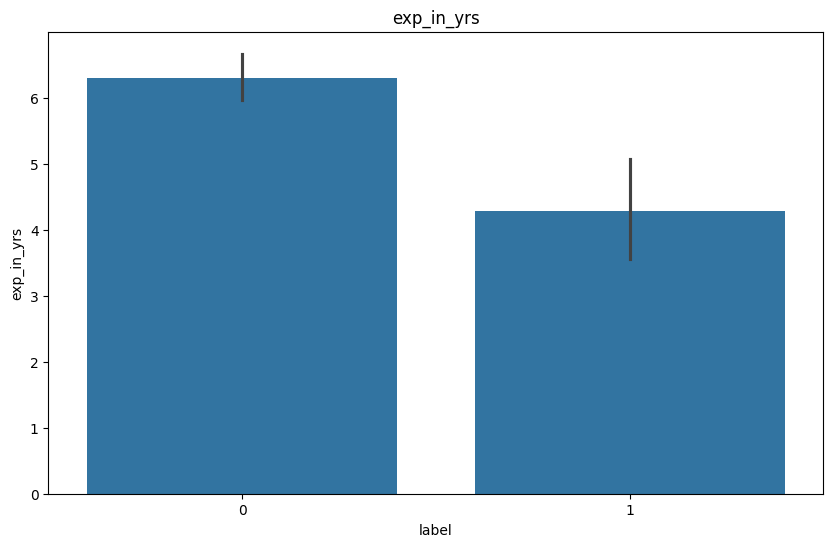

In [56]:
for col_name in df.columns:
    plt.figure(figsize=(10,6))
    sns.barplot(x='label',y=col_name,data=df)
    plt.title(f'{col_name}')
    plt.show()

In [57]:
#label encoding
col_names=['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION','Marital_status', 'Housing_type']

label_encoder=LabelEncoder()

for col in col_names:
    df[col]=label_encoder.fit_transform(df[col].values)

## ✔️Data Pre-processing

In [58]:
df.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Work_Phone,Phone,EMAIL_ID,Family_Members,label,age,exp_in_yrs
0,1,1,1,0,180000.00,1,1,1,5,0,0,0,2,1,51.0,0.00
1,0,1,0,0,315000.00,0,1,1,5,1,1,0,2,1,37.0,1.61
2,0,1,0,0,315000.00,0,1,1,5,1,1,0,2,1,44.0,1.61
3,0,1,0,0,191399.33,0,1,1,5,1,1,0,2,1,37.0,1.61
4,0,1,0,0,315000.00,0,1,1,5,1,1,0,2,1,37.0,1.61


In [59]:
x=df.drop(['label',],axis=1)
y=df['label']

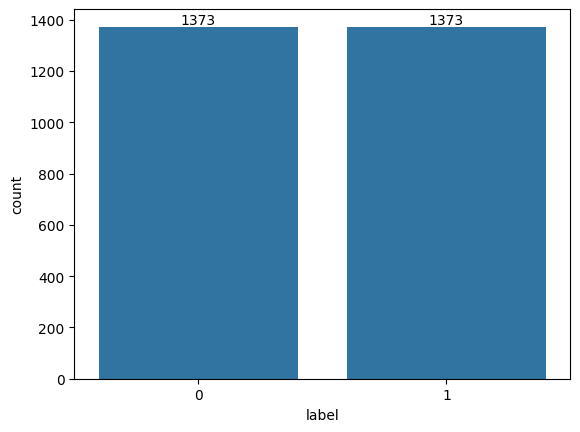

In [60]:
#Balance the dataset
resamp = RandomOverSampler()
x_resampled,y_resampled = resamp.fit_resample(x, y)
sampled=sns.countplot(data=df, x=y_resampled)
sampled.bar_label(sampled.containers[0])
plt.show()

### ✔️Features Scalling

In [61]:
#Split the resampled dataset into Training and Testing sets
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled ,test_size=0.2,random_state=42)

In [62]:
#Scalling the datasets
Scaler=StandardScaler()
x_train_scaled=Scaler.fit_transform(x_train)
x_test_scaled=Scaler.fit_transform(x_test)

In [63]:
x_train.columns

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income',
       'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members', 'age',
       'exp_in_yrs'],
      dtype='object')

### ✔️Features Selection

In [64]:
# Initialize Logistic Regression model
model = LogisticRegression()

rfe = RFE(model, n_features_to_select=13)
fit = rfe.fit(x_train_scaled, y_train)

# Evaluate Selected Features
selected_features = fit.support_
print("Selected Features:", x_train.columns[selected_features])

# Rank Features
feature_ranking = fit.ranking_
features_selected=dict(zip(x_train.columns, feature_ranking))

Selected Features: Index(['GENDER', 'Car_Owner', 'CHILDREN', 'Annual_income', 'Type_Income',
       'EDUCATION', 'Marital_status', 'Housing_type', 'Work_Phone', 'EMAIL_ID',
       'Family_Members', 'age', 'exp_in_yrs'],
      dtype='object')


In [65]:
features_selected

{'GENDER': 1,
 'Car_Owner': 1,
 'Propert_Owner': 2,
 'CHILDREN': 1,
 'Annual_income': 1,
 'Type_Income': 1,
 'EDUCATION': 1,
 'Marital_status': 1,
 'Housing_type': 1,
 'Work_Phone': 1,
 'Phone': 3,
 'EMAIL_ID': 1,
 'Family_Members': 1,
 'age': 1,
 'exp_in_yrs': 1}

In [66]:
#Extract the Relevant Features
x_train_selected = x_train_scaled[:, selected_features]
x_test_selected = x_test_scaled[:, selected_features]

## ✔️Model Building

In [67]:
#defining a function for printing Model Performance
def model_performance(y_pred,y_test,model):
  acc=round(accuracy_score(y_pred,y_test)*100,2)
  prec=round(precision_score(y_pred,y_test)*100,2)
  f1=round(f1_score(y_pred,y_test)*100,2)
  class_f=classification_report(y_pred,y_test)
  print(f'{model} model Performance\n')
  print(f'Accuracy Score: {acc}%\n')
  print(f'Precission Score : {prec}%\n')
  print(f'F1 Score : {f1}%\n')
  print('Classification Report :\n')
  print(class_f)

### 1.Logistic Regression Model

In [68]:
#Defining splits of StratifiedKFold for Cross Validation
skf = StratifiedKFold(n_splits=4)

In [69]:
#Initializing the Model
lr_model=LogisticRegression()

#train the model on Training sets
final_lr_model=lr_model.fit(x_train_selected,y_train)

#Predict on testing sets
lr_y_pred=final_lr_model.predict(x_test_selected)

In [70]:
model_performance(lr_y_pred,y_test,'Logistic Regression')

Logistic Regression model Performance

Accuracy Score: 60.36%

Precission Score : 61.31%

F1 Score : 60.65%

Classification Report :

              precision    recall  f1-score   support

           0       0.59      0.61      0.60       270
           1       0.61      0.60      0.61       280

    accuracy                           0.60       550
   macro avg       0.60      0.60      0.60       550
weighted avg       0.60      0.60      0.60       550



In [71]:
lr_df = pd.DataFrame({"actual":y_test,"predicted":lr_y_pred})
lr_df.head(5)

,actual,predicted
1264,0,0
2359,1,1
1778,1,1
1632,1,1
2657,1,1


### 2.Decision Tree MOdel

In [72]:
#Initializing the Model
dt_model=DecisionTreeClassifier()

# defining parameter range
param_grid_dt = {'criterion': ['entropy', 'gini'],
              'max_depth': [10,30,50],
              'min_samples_split': [10,20,40],
              'min_samples_leaf': [10,15,20,60]}



grid_dt = GridSearchCV(estimator = dt_model,
                    param_grid = param_grid_dt,
                    scoring = 'balanced_accuracy',
                    cv = skf,
                    verbose =3)

# fitting the model for grid search

gridResult_dt = grid_dt.fit(x_train_selected,y_train)
print(f"Best result = {gridResult_dt.best_score_:1.2f} and parameters = {gridResult_dt.best_params_}")

Fitting 4 folds for each of 72 candidates, totalling 288 fits
[CV 1/4] END criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=10;, score=0.787 total time=   0.0s
[CV 2/4] END criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=10;, score=0.723 total time=   0.0s
[CV 3/4] END criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=10;, score=0.776 total time=   0.0s
[CV 4/4] END criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=10;, score=0.741 total time=   0.0s
[CV 1/4] END criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=20;, score=0.787 total time=   0.0s
[CV 2/4] END criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=20;, score=0.723 total time=   0.0s
[CV 3/4] END criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=20;, score=0.776 total time=   0.0s
[CV 4/4] END criterion=entropy, max_depth=10, min_samples_leaf=10, min_samples_split=20;, s

In [73]:
final_dt_model = gridResult_dt.best_estimator_

dt_y_pred = final_dt_model.predict(x_test_selected)

#get the model performance
model_performance(dt_y_pred,y_test,'Decision Tree')

Decision Tree model Performance

Accuracy Score: 72.73%

Precission Score : 70.07%

F1 Score : 71.91%

Classification Report :

              precision    recall  f1-score   support

           0       0.75      0.72      0.73       290
           1       0.70      0.74      0.72       260

    accuracy                           0.73       550
   macro avg       0.73      0.73      0.73       550
weighted avg       0.73      0.73      0.73       550



In [74]:
dt_df = pd.DataFrame({"actual":y_test,"predicted":dt_y_pred})
dt_df.head(5)

,actual,predicted
1264,0,0
2359,1,1
1778,1,1
1632,1,1
2657,1,1


### 3.RandomForest Classifier Model

In [75]:
#Initializing the Model
rfc_model=RandomForestClassifier()

param_grids={'criterion': ['entropy', 'gini'],
              'max_depth': [10,15,18],
              'n_estimators': [100,150],
              'min_samples_leaf':[2,3,4]
            }


grid = GridSearchCV(estimator = rfc_model,
                    param_grid = param_grids,
                    scoring = 'accuracy',
                    cv = skf,
                    verbose =3)

# fitting the model for grid search

gridResult = grid.fit(x_train_selected,y_train)
print(f"Best result = {gridResult.best_score_:1.2f} and parameters = {gridResult.best_params_}")

Fitting 4 folds for each of 36 candidates, totalling 144 fits
[CV 1/4] END criterion=entropy, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=0.903 total time=   0.3s
[CV 2/4] END criterion=entropy, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=0.933 total time=   0.3s
[CV 3/4] END criterion=entropy, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=0.944 total time=   0.2s
[CV 4/4] END criterion=entropy, max_depth=10, min_samples_leaf=2, n_estimators=100;, score=0.896 total time=   0.3s
[CV 1/4] END criterion=entropy, max_depth=10, min_samples_leaf=2, n_estimators=150;, score=0.911 total time=   0.4s
[CV 2/4] END criterion=entropy, max_depth=10, min_samples_leaf=2, n_estimators=150;, score=0.929 total time=   0.4s
[CV 3/4] END criterion=entropy, max_depth=10, min_samples_leaf=2, n_estimators=150;, score=0.947 total time=   0.4s
[CV 4/4] END criterion=entropy, max_depth=10, min_samples_leaf=2, n_estimators=150;, score=0.911 total time=   0.4s
[CV 1/4] E

In [76]:
final_rfc_model = gridResult.best_estimator_

rfc_y_pred = final_rfc_model.predict(x_test_selected)

#get the model Perforamnce
model_performance(rfc_y_pred,y_test,'Random Forest Classifier')

Random Forest Classifier model Performance

Accuracy Score: 94.0%

Precission Score : 93.43%

F1 Score : 93.94%

Classification Report :

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       279
           1       0.93      0.94      0.94       271

    accuracy                           0.94       550
   macro avg       0.94      0.94      0.94       550
weighted avg       0.94      0.94      0.94       550



In [77]:
rfc_df = pd.DataFrame({"actual":y_test,"predicted":rfc_y_pred})
rfc_df.head(5)

,actual,predicted
1264,0,0
2359,1,1
1778,1,1
1632,1,1
2657,1,1


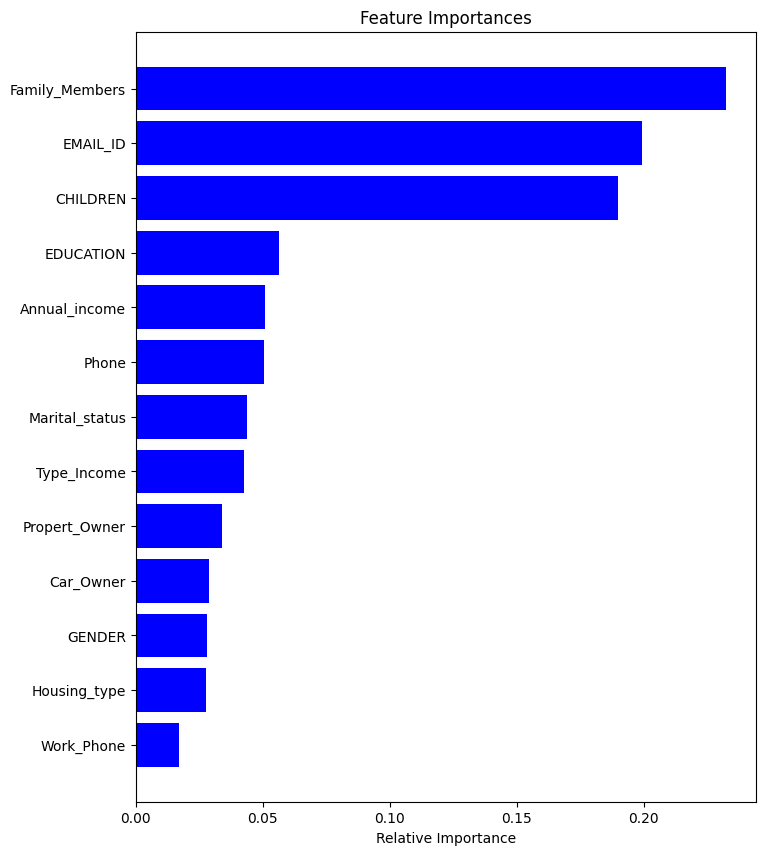

In [78]:
#Feature Importances according to Random Forest Classifier
features = x_train.columns
importances = final_rfc_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### 4. KNN Classifier MOdel

In [79]:
#Initializing the Model
knn_model= KNeighborsClassifier()

# defining parameter range
param_grid_knn = {'n_neighbors': [3,5],
                   'leaf_size' : [20,30],
                  'p': [2,3,4],
                  'weights':['uniform', 'distance']
                  }

grid_knn = GridSearchCV(estimator = knn_model,
                    param_grid = param_grid_knn,
                    scoring = 'accuracy',
                    cv = skf,
                    verbose = 3)

# fitting the model for grid search
gridResult_knn = grid_knn.fit(x_train_selected,y_train )
print(f"Best result = {gridResult_knn.best_score_:1.2f} and parameters = {gridResult_knn.best_params_}")

Fitting 4 folds for each of 24 candidates, totalling 96 fits
[CV 1/4] END leaf_size=20, n_neighbors=3, p=2, weights=uniform;, score=0.896 total time=   0.1s
[CV 2/4] END leaf_size=20, n_neighbors=3, p=2, weights=uniform;, score=0.869 total time=   0.1s
[CV 3/4] END leaf_size=20, n_neighbors=3, p=2, weights=uniform;, score=0.849 total time=   0.0s
[CV 4/4] END leaf_size=20, n_neighbors=3, p=2, weights=uniform;, score=0.871 total time=   0.1s
[CV 1/4] END leaf_size=20, n_neighbors=3, p=2, weights=distance;, score=0.920 total time=   0.0s
[CV 2/4] END leaf_size=20, n_neighbors=3, p=2, weights=distance;, score=0.894 total time=   0.0s
[CV 3/4] END leaf_size=20, n_neighbors=3, p=2, weights=distance;, score=0.863 total time=   0.0s
[CV 4/4] END leaf_size=20, n_neighbors=3, p=2, weights=distance;, score=0.894 total time=   0.0s
[CV 1/4] END leaf_size=20, n_neighbors=3, p=3, weights=uniform;, score=0.903 total time=   0.1s
[CV 2/4] END leaf_size=20, n_neighbors=3, p=3, weights=uniform;, score=

In [80]:
final_knn_model = gridResult_knn.best_estimator_

knn_y_pred = final_knn_model.predict(x_test_selected)

#get the model PErformance
model_performance(knn_y_pred,y_test,'KNN Classifier Model')

KNN Classifier Model model Performance

Accuracy Score: 90.18%

Precission Score : 97.81%

F1 Score : 90.85%

Classification Report :

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       234
           1       0.98      0.85      0.91       316

    accuracy                           0.90       550
   macro avg       0.90      0.91      0.90       550
weighted avg       0.91      0.90      0.90       550



In [81]:
knn_df = pd.DataFrame({"actual":y_test,"predicted":knn_y_pred})
knn_df.head(5)

,actual,predicted
1264,0,0
2359,1,1
1778,1,1
1632,1,1
2657,1,1


### 5.XGBOOST MODEL

In [82]:
# Initializing the model
xgmodel = xgb.XGBClassifier(objective ='binary:logistic')


param_gridxg = {'criterion': ['entropy', 'gini'],
                   'max_depth': [20,30,40],
                   'n_estimators': [70,80],
                   'learning_rate' : [0.1, 0.2],
                   'colsample_bytree' : [0.5,0.8],
                   'alpha' : [1,2],
                  }

In [83]:

grid_xg = GridSearchCV(estimator = xgmodel,
                    param_grid = param_gridxg,
                    scoring = 'balanced_accuracy',
                    cv = skf,
                    verbose = 3)

# fitting the model for grid search

xggridResult = grid_xg.fit(x_train_selected,y_train)
print(f"Best result = {xggridResult.best_score_:1.2f} and parameters = {xggridResult.best_params_}")

Fitting 4 folds for each of 192 candidates, totalling 768 fits
[CV 1/4] END alpha=1, colsample_bytree=0.5, criterion=entropy, learning_rate=0.1, max_depth=20, n_estimators=70, scale_pos_weight=1.5;, score=0.955 total time=   0.4s
[CV 2/4] END alpha=1, colsample_bytree=0.5, criterion=entropy, learning_rate=0.1, max_depth=20, n_estimators=70, scale_pos_weight=1.5;, score=0.940 total time=   0.1s
[CV 3/4] END alpha=1, colsample_bytree=0.5, criterion=entropy, learning_rate=0.1, max_depth=20, n_estimators=70, scale_pos_weight=1.5;, score=0.947 total time=   0.1s
[CV 4/4] END alpha=1, colsample_bytree=0.5, criterion=entropy, learning_rate=0.1, max_depth=20, n_estimators=70, scale_pos_weight=1.5;, score=0.949 total time=   0.1s
[CV 1/4] END alpha=1, colsample_bytree=0.5, criterion=entropy, learning_rate=0.1, max_depth=20, n_estimators=70, scale_pos_weight=2.0;, score=0.958 total time=   0.1s
[CV 2/4] END alpha=1, colsample_bytree=0.5, criterion=entropy, learning_rate=0.1, max_depth=20, n_esti

In [84]:
final_xg_model = xggridResult.best_estimator_

xg_y_pred= final_xg_model.predict(x_test_selected)

# get the model peroformance
model_performance(xg_y_pred,y_test,'XG Boost')

XG Boost model Performance

Accuracy Score: 58.55%

Precission Score : 18.25%

F1 Score : 30.49%

Classification Report :

              precision    recall  f1-score   support

           0       0.99      0.55      0.70       496
           1       0.18      0.93      0.30        54

    accuracy                           0.59       550
   macro avg       0.58      0.74      0.50       550
weighted avg       0.91      0.59      0.67       550



In [85]:
xgb_kf_df = pd.DataFrame({"actual":y_test,"predicted":xg_y_pred})
xgb_kf_df.head(5)

,actual,predicted
1264,0,0
2359,1,0
1778,1,0
1632,1,0
2657,1,1


### ✔️Best MOdel for Credit Card Approval

In [86]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN Classifier', 'XGBoost']

y_preds = [lr_y_pred, dt_y_pred, rfc_y_pred, knn_y_pred, xg_y_pred]


models_score = pd.DataFrame({
    'Model': models,
    'Accuracy': [round(accuracy_score(pred, y_test), 2) for pred in y_preds],
    'Precision': [round(precision_score(pred, y_test), 2) for pred in y_preds],
    'Recall':[round(recall_score(pred,y_test),2)for pred in y_preds],
    'F1 Score': [round(f1_score(pred, y_test), 2) for pred in y_preds]
})

models_score

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.60,0.61,0.60,0.61
1,Decision Tree,0.73,0.70,0.74,0.72
2,Random Forest,0.94,0.93,0.94,0.94
3,KNN Classifier,0.90,0.98,0.85,0.91
4,XGBoost,0.59,0.18,0.93,0.30


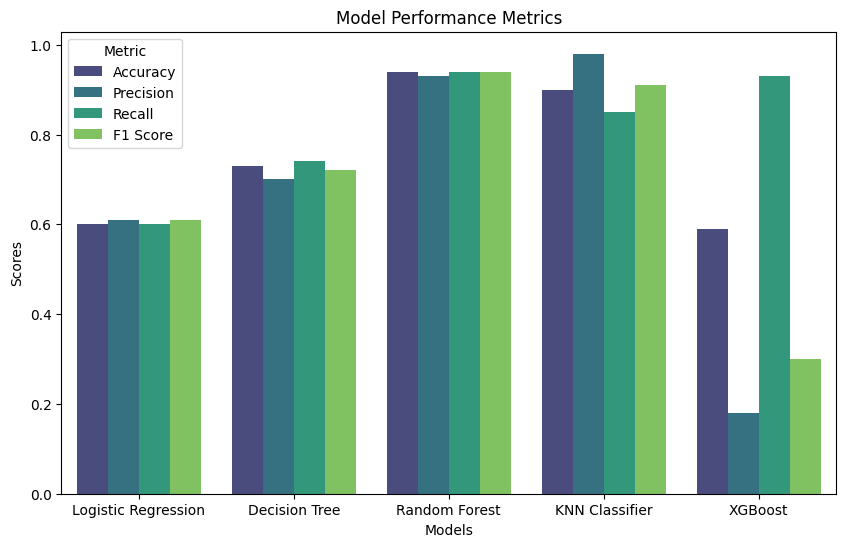

In [87]:
# Melt the DataFrame for easy plotting
models_score_melted = models_score.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=models_score_melted, palette='viridis')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Metrics')

plt.show()


**Best ML model for Credit Card Approval:**

👉In my search for the best credit card approval predictor, I've found that the Random Forest algorithm stands out as the top choice.

**Why Random Forest is best ?**


👉The Random Forest model exhibits the highest accuracy and a balanced F1 score, making it well-suited for minimizing both false positives and false negatives. This performance is crucial in credit card approval scenarios where precision and recall are of equal importance.

In summary, for accurate and balanced credit card approval predictions, the Random Forest model stands out as the top-performing choice.



---



# ✔️Conclusion

👉 I have completed the project, covering a thorough analysis of the data. I have looked closely at the numbers, graphs, and patterns to understand the information better. I have also cleaned up the data, fixed any missing parts, and made sure everything is good to go. Additionally, I have come up with some smart ways to use the data for predicting credit card approvals. The techniques I have used are quite advanced, making our predictions more accurate. I have checked and refined my work several times to make sure it's solid and ready for real-world use.


👉 In the development of our credit card approval model,ie have carefully selected numerous factors to enhance prediction accuracy.  However, there are additional features that can further enhance the performance of the model. Such as:

1. **Credit Score**- A credit score summarizes an individual's credit history in numeric manner.Ex-Cibil Score, FICO Score, Credit Bureau Score.
2. **Debt-to-Income Ratio**-A lower debt-to-income ratio suggests better financial health.
3. **Outstanding Debts**-The total amount of outstanding debts, including credit card balances and loans, is evaluated. High levels of outstanding debt may impact creditworthiness.
4. **Frequency of Transactions**-Regular usage of credit cards for transactions may indicate responsible financial behavior and may raise quenstion about the applicants credit needs.

### ✔️Alternate Hypothesis
1. **Data Analysis**-In my analysis, based on an independent two-sample t-test,Analysis and INterpretation, Data Visualization
provides evidence to reject the null hypothesis, suggesting that there is a no significant difference in mean annual incomes between the approved and denied credit card applications. Based on the available evidence, annual income alone may not be a distinguishing factor in credit card approval decisions. Other variables or factors might play a more prominent role in determining the approval status of credit card applications.


2. **Machine Learning**-After a throrough analysis, it is suggesting that ther is no perfect evidence to disproove the Null Hypothesis, it's clear that Random Forest did a better job than the other models in predicting whether a credit card application would be approved. It consistently showed higher accuracy and reliability.

### ✔️Steps Involves in Hypothesis Testing

👉To prove or disprove the hypothesis that there is significant relationship between annual income and the credit card approval status,I have used following statistical and analytical approaches:

1. Data Preparation and Visualization
2. Hypothesis Testing
3. Analysis and Interpretation
4. Machine Learning Models
5. Cross-Validation
6. Domain Expert Consultation

### ✔️Relevant Feature Engineering Techniques

From the various Feature Engineering techniques i used following techniques to enhance the performance of my Machine Learning Models:

1. **Feature Scalling**- I used StandardScalaer to strandize the numerical features ensuring that they are in same scale.
2. **Feature Encoding**- I used Label Encoding on the Categorical Features for better perormance of Machine Learning MOdels.
3. **Feature Selection**- In my Model i used Recursive Feature Elimination(RFE) and Feature Importance from th Randome Forest models to identify and keep the most relevant features.

# ✔️SQL Analysis

In [88]:
#Import DUCKDB
import duckdb

#Establishing connection with duck db
conn=duckdb.connect()

In [89]:
#Register the Dataframe into duckdb module
conn.register("cust_info",SQL_data)

In [90]:
conn.execute("select * from cust_info").fetchdf()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Work_Phone,Phone,EMAIL_ID,Family_Members,label,age,exp_in_yrs
0,5008827,M,Y,Y,0,180000.00,Pensioner,Higher education,Married,house,0,0,0,2,1,51.0,0.00
1,5009744,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,house,1,1,0,2,1,37.0,1.61
2,5009746,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,house,1,1,0,2,1,44.0,1.61
3,5009749,F,Y,N,0,191399.33,Commercial associate,Higher education,Married,house,1,1,0,2,1,37.0,1.61
4,5009752,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,house,1,1,0,2,1,37.0,1.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,191399.33,Commercial associate,Higher education,Married,house,0,0,0,2,0,33.0,5.98
1544,5023655,F,N,N,0,225000.00,Commercial associate,Incomplete higher,single,house,0,0,0,1,0,28.0,3.31
1545,5115992,M,Y,Y,2,180000.00,Working,Higher education,Married,house,0,0,0,4,0,36.0,6.79
1546,5118219,M,Y,N,0,270000.00,Working,secondary,Civil marriage,house,1,1,0,2,0,42.0,1.77


#### **1.Group the customers based on their income type and find the average of their annual income.**



In [91]:
query1 = '''
SELECT Type_Income, AVG(Annual_income) AS Avg_Income
FROM cust_info
GROUP BY Type_Income
'''

result1=conn.execute(query1).fetchdf()
result1

,Type_Income,Avg_Income
0,Pensioner,155713.746543
1,Working,181191.434373
2,State servant,211422.413793
3,Commercial associate,233653.136000


#### **2.Find the female owners of cars and property.**

In [92]:
query2='''
SELECT *
FROM cust_info
WHERE GENDER='F'
AND Car_Owner='Y'
AND Propert_Owner='Y';
'''

result2=conn.execute(query2).fetchdf()
result2

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Work_Phone,Phone,EMAIL_ID,Family_Members,label,age,exp_in_yrs
0,5018498,F,Y,Y,0,90000.00,Working,secondary,Married,house,1,1,0,2,1,52.0,2.75
1,5018501,F,Y,Y,0,191399.33,Working,secondary,Married,house,1,1,0,2,1,52.0,2.75
2,5018503,F,Y,Y,0,90000.00,Working,secondary,Married,house,1,1,0,2,1,52.0,2.75
3,5024213,F,Y,Y,0,540000.00,Commercial associate,Higher education,Married,house,0,1,0,2,1,43.0,0.51
4,5036660,F,Y,Y,0,76500.00,Pensioner,secondary,Married,house,0,0,0,2,1,65.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,5048458,F,Y,Y,1,126000.00,Working,Higher education,Married,house,0,0,0,3,0,26.0,0.43
175,5023719,F,Y,Y,0,175500.00,Pensioner,Higher education,Married,house,0,1,0,2,0,60.0,0.00
176,5033520,F,Y,Y,3,180000.00,Working,secondary,Married,Municipal apartment,0,1,0,5,0,34.0,16.06
177,5024049,F,Y,Y,1,144000.00,Working,Higher education,Married,house,0,0,0,3,0,35.0,8.01


#### **3.Find the male customers who are staying with their families.**

In [93]:
query3='''
SELECT *
FROM cust_info
WHERE GENDER='M'
AND
Family_Members > 1;
'''

result3=conn.execute(query3).fetchdf()
result3

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Work_Phone,Phone,EMAIL_ID,Family_Members,label,age,exp_in_yrs
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,house,0,0,0,2,1,51.0,0.00
1,5010864,M,Y,Y,1,450000.0,Commercial associate,secondary,Married,house,0,1,1,3,1,50.0,1.86
2,5010868,M,Y,Y,1,450000.0,Pensioner,secondary,Married,house,0,1,1,3,1,50.0,1.86
3,5021303,M,N,N,1,472500.0,Pensioner,Higher education,Married,With parents,0,0,1,3,1,24.0,2.50
4,5021310,M,N,Y,0,270000.0,Working,secondary,Married,house,0,0,0,2,1,46.0,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,5096856,M,Y,Y,0,180000.0,Commercial associate,secondary,Married,house,0,0,0,2,0,49.0,9.52
466,5090942,M,N,N,0,225000.0,Commercial associate,secondary,Married,house,0,0,0,2,0,37.0,3.93
467,5118268,M,Y,N,1,360000.0,State servant,secondary,Married,house,0,1,0,3,0,31.0,9.69
468,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,house,0,0,0,4,0,36.0,6.79


#### **4.Please list the top five people having the highest income.**

In [94]:
QUERY4='''
SELECT *
FROM cust_info
ORDER BY Annual_income DESC
LIMIT 5
'''
result4=conn.execute(QUERY4).fetchdf()
result4

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Work_Phone,Phone,EMAIL_ID,Family_Members,label,age,exp_in_yrs
0,5143231,F,Y,Y,1,1575000.0,Commercial associate,Higher education,single,house,0,0,0,2,0,28.0,6.79
1,5143235,F,Y,Y,1,1575000.0,Commercial associate,Higher education,single,house,0,0,0,2,0,28.0,6.79
2,5090470,M,N,Y,1,900000.0,Working,secondary,Married,house,0,0,0,3,0,42.0,12.35
3,5079016,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,house,0,0,0,4,0,27.0,2.74
4,5079017,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,house,0,0,0,4,0,27.0,2.74


#### **5.How many married people are having bad credit?**

In [100]:
query5='''
SELECT count(*) as No_of_Applicants
FROM cust_info
WHERE  label=0 AND
(Marital_status='Married' or Marital_status='Civil marriage');

'''
result5=conn.execute(query5).fetchdf()
result5

,No_of_Applicants
0,1032


#### **6.What is the highest education level and what is the total count?**

In [96]:
query6='''
SELECT EDUCATION,COUNT(*) as Total_Count
FROM cust_info
WHERE EDUCATION= 'Higher education'
GROUP BY EDUCATION
'''

result6=conn.execute(query6).fetchdf()
result6

,EDUCATION,Total_Count
0,Higher education,426


###**7.Between married males and females, who is having more bad credit?**

In [101]:
query7='''
SELECT GENDER,label, count(*) as No_of_Applicants
FROM cust_info
WHERE label=0 AND
(Marital_status='Married' or Marital_status='Civil marriage')
GROUP BY 1,2
ORDER BY 3 DESC
LIMIT 1
'''

result7=conn.execute(query7).fetchdf()
result7


,GENDER,label,No_of_Applicants
0,F,0,628


Dear Readers,


Thank you for taking the time to explore my "Credit Card Approval with DA & ML" Project.

Regards

***Fransis Chand***



---



---

